In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from collections import Counter
import matplotlib.colors
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/introdiction to DS/FinalProject/data/UsedCarListingCleaning.csv')
del df['Unnamed: 0']
print(df.shape)
df.head()

(24641, 16)


,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
0,Xe Ford Everest Titanium 2.0L 4x2 AT 2022,Ford,Everest,950,2022,Đen,Đen,30000,7,5.0,Nhập khẩu,SUV,Số tự động,RFD - Dẫn động cầu sau,Dầu,2.0
1,Xe Lexus RX 200t 2017,Lexus,RX,1990,2017,Trắng,Đen,50000,5,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.0
2,Xe Mercedes Benz S class S450L Luxury 2020,Mercedes Benz,S class,2790,2020,Trắng,Nâu,30000,5,4.0,Lắp ráp trong nước,Sedan,Số tự động,RFD - Dẫn động cầu sau,Xăng,3.0
3,Xe Toyota Vios 1.5G 2019,Toyota,Vios,448,2019,Đen,Kem,46000,5,4.0,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.5
4,Xe Volvo S60 T5 R,Volvo,S60,1279,2021,Trắng,Đen,19000,5,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.0


In [5]:
unique_values_array = {}

for column in df.select_dtypes(include=['object']).columns:
  unique_values = df[column].unique()
  unique_values_array[column] = unique_values.tolist()
  if column.__eq__('year'):
    unique_values_array[column] = [str(value) for value in unique_values_array]

In [ ]:
unique_rows = df[df.duplicated(subset='make', keep=False) == False]
unique_rows

# **0. Data overview**

In [ ]:
df.columns

Index(['name', 'make', 'model', 'price', 'year', 'exterior_color',
       'interior_color', 'mileage', 'num_seats', 'num_doors', 'origin',
       'style', 'transmission', 'drivetrain', 'fuel', 'liter'],
      dtype='object')

In [ ]:
df.describe(include='all')

,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
count,24641,24641,24641,24641.000000,24641.000000,24641,24641,2.464100e+04,24641.000000,24641.000000,24641,24641,24641,24641,24641,24641.000000
unique,4707,71,459,NaN,NaN,17,17,NaN,NaN,NaN,2,10,3,5,4,NaN
top,Xe Mazda 3 1.5 AT 2018,Toyota,Morning,NaN,NaN,Trắng,Đen,NaN,NaN,NaN,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,NaN
freq,90,4780,963,NaN,NaN,7799,10050,NaN,NaN,NaN,14589,8664,19305,13595,20761,NaN
mean,NaN,NaN,NaN,932.956739,2016.255834,NaN,NaN,4.142358e+05,5.575301,4.501522,NaN,NaN,NaN,NaN,NaN,2.056230
std,NaN,NaN,NaN,1588.267007,5.343346,NaN,NaN,3.137158e+07,1.728374,0.629696,NaN,NaN,NaN,NaN,NaN,0.843075
min,NaN,NaN,NaN,6.000000,1989.000000,NaN,NaN,0.000000e+00,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.100000
25%,NaN,NaN,NaN,318.000000,2014.000000,NaN,NaN,5.000000e+03,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN,1.500000
50%,NaN,NaN,NaN,496.000000,2018.000000,NaN,NaN,3.500000e+04,5.000000,5.000000,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,850.000000,2020.000000,NaN,NaN,7.200000e+04,7.000000,5.000000,NaN,NaN,NaN,NaN,NaN,2.400000


### Vehicle information summary
1. Model years between 1989-2023
2. Mileage ranging 0 kilomiles to 4.294967e+09 kilomiles
3. Price ranging from 6 million dong to about 40 billion dong
4. Number of seats: 1 to 47
5. Number of doors: 1 to 8
5. There are
71 Makes,
459 Models,
17 unique exterior colors,
17 unique interior colors,
3 unique transmission,
5 unique drivetrain,
10 unique style,
4 unique fuel type,
2 unique origin


# **1. Vehicle listing count analysis**

## 1.1 Vehicle listings for different carmakers

---



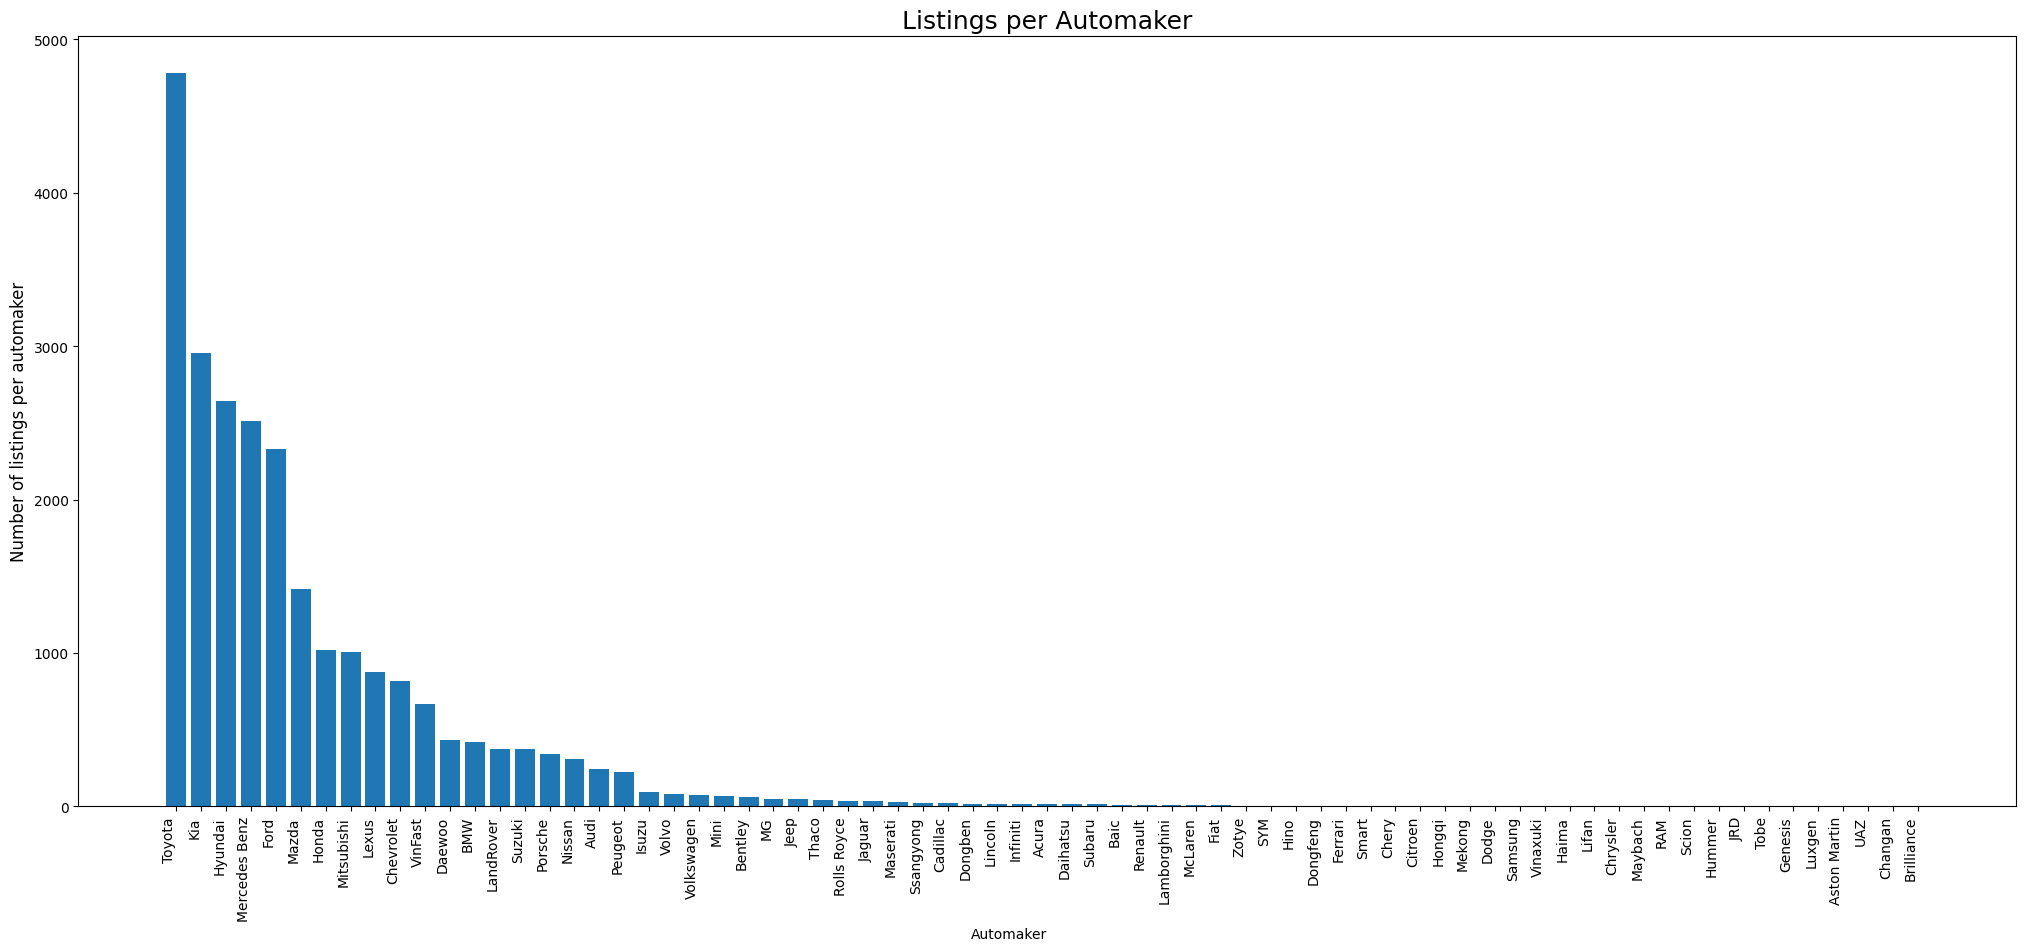

In [ ]:
value_counts = df['make'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per automaker', fontsize=12)
plt.xlabel('Automaker', rotation=0, ha='right')
plt.title('Listings per Automaker', fontsize=18)
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
print('Ratio Toyota: ', len(df[(df.make=='Toyota')])/len(df))
print("Ratio Toyota, Kia, Hyundai, Mercedes Benz, Ford: ", len(df[(df.make=='Toyota') | (df.make=='Kia') | (df.make=='Hyundai') | (df.make=='Mercedes Benz') | (df.make=='Ford')])/len(df))

Ratio Toyota:  0.19398563369993102
Ratio Toyota, Kia, Hyundai, Mercedes Benz, Ford:  0.6177914857351569


### Main findings:

Information regarding the market share of brands such as Toyota, Kia, Hyundai, Mercedes Benz, and Ford in the dataset provides valuable insights into the diversity of the used car market:

* Toyota Dominance: The fact that Toyota vehicles hold the largest share in the dataset (19.4%) may indicate the popularity and widespread acceptance of this brand in the used car market. This could reflect the quality, reliability, or high availability of Toyota models.

* Diversity from Multiple Brands: The combined share of Toyota, Kia, Hyundai, Mercedes Benz, and Ford is 61.78%. This demonstrates the market's diversity with the presence of various car manufacturers.

* Preferences for Specific Brands: This overall share may reflect specific characteristics and preferences of car buyers in the particular market. The significant representation of brands like Kia, Hyundai, Mercedes Benz, and Ford could indicate diversity and interest in the models offered by these brands.

* Mixed Market of Major and Minor Brands: The combination of major brands like Toyota with others such as Kia, Hyundai, Mercedes Benz, and Ford suggests a market that blends both large and smaller brands, providing a diverse range of options for car buyers."




## 1.2 Vehicle listings for different models


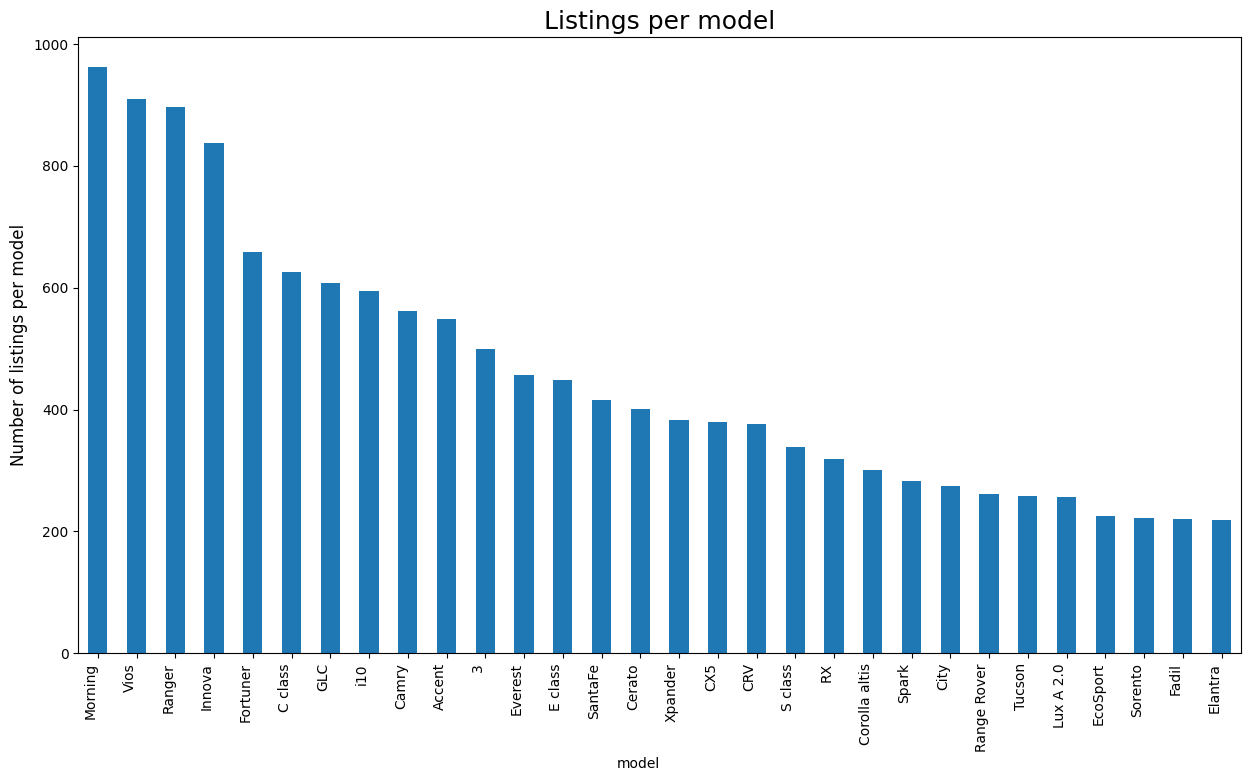

In [ ]:
df.groupby(['model'])['year'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8))

plt.ylabel('Number of listings per model', fontsize=12)
plt.xlabel('model', rotation=0, ha='right')
plt.title('Listings per model', fontsize=18)
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
len(df[(df.model=='Morning') | (df.model=='Vios') | (df.model=='Ranger') | (df.model=='Innova')])/len(df)

0.14638204618319062

In [ ]:
value_counts = df['model'].value_counts()
labels = value_counts.index
labels

Index(['Morning', 'Vios', 'Ranger', 'Innova', 'Fortuner', 'C class', 'GLC',
       'i10', 'Camry', 'Accent',
       ...
       'Sandero', 'H2', '350Z', 'Super Saloon', 'SRM T20', 'Galloper', 'Star',
       'Daily', 'A3', 'Universe Xpress Luxury'],
      dtype='object', length=459)

###Main findings:
The Kia Morning, Toyota Vios, Toyota Innova, and Ford Ranger collectively constitute a significant portion, accounting for approximately 14.63% of the total sales of used cars. The diversity among car models is extensive, with a staggering 459 different models from various manufacturers being sold. These models range from luxury vehicles to more affordable options, reflecting a broad spectrum in the market. Notably, Toyota and Kia continue to hold a substantial share in the overall distribution of car models.


## 1.3 Vehicle listings for different years

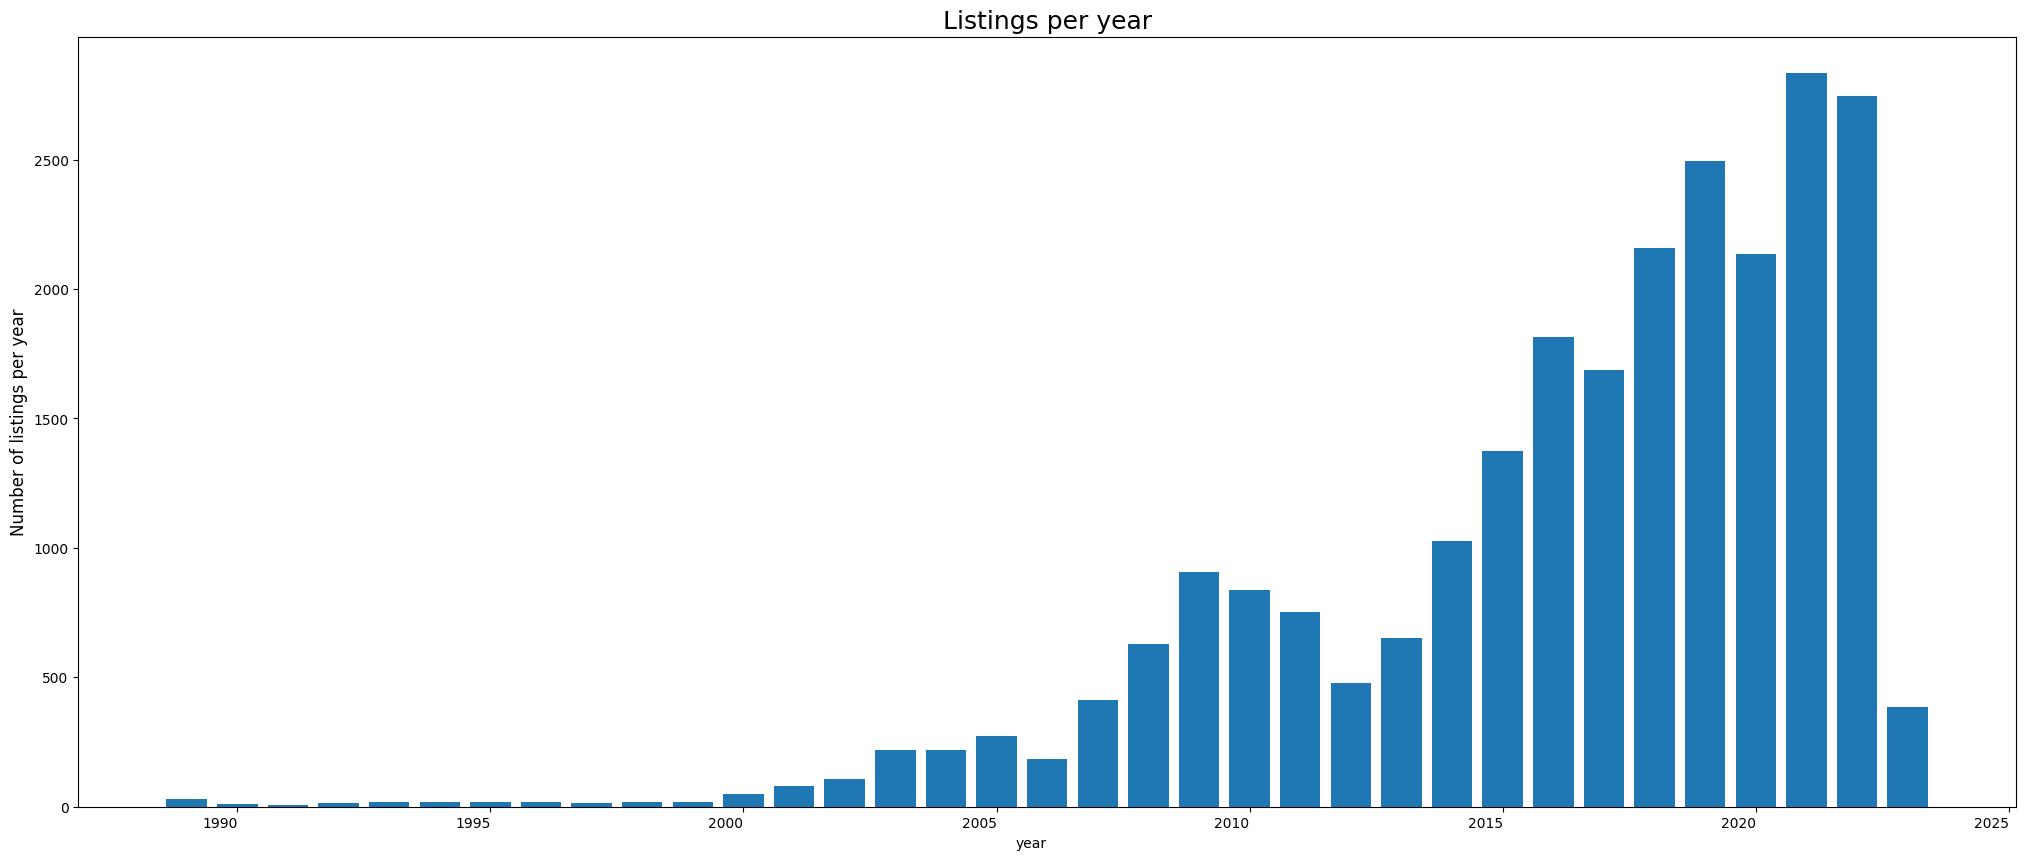

In [ ]:
value_counts = df['year'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per year', fontsize=12)
plt.xlabel('year', rotation=0, ha='right')
plt.title('Listings per year', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
len(df[(df.year==2019) | (df.year==2021) | (df.year==2022)])/len(df)

0.3276652733249462

### Main findings:

The number of used cars produced in 2021, 2022, and 2019 that were sold the most, accounting for 32.77% of the total, is notable.
The bar chart exhibits a certain level of fluctuation, yet a common trend can be observed wherein it steadily increases until 2009, subsequently decreases until 2012, and experiences a substantial rise thereafter, peaking in 2021 and 2022.

The year 2023 is represented as having a relatively low proportion, likely due to the fact that it is still ongoing and a significant number of people are currently using cars from this year.

## 1.4 Vehicle listings for different external color

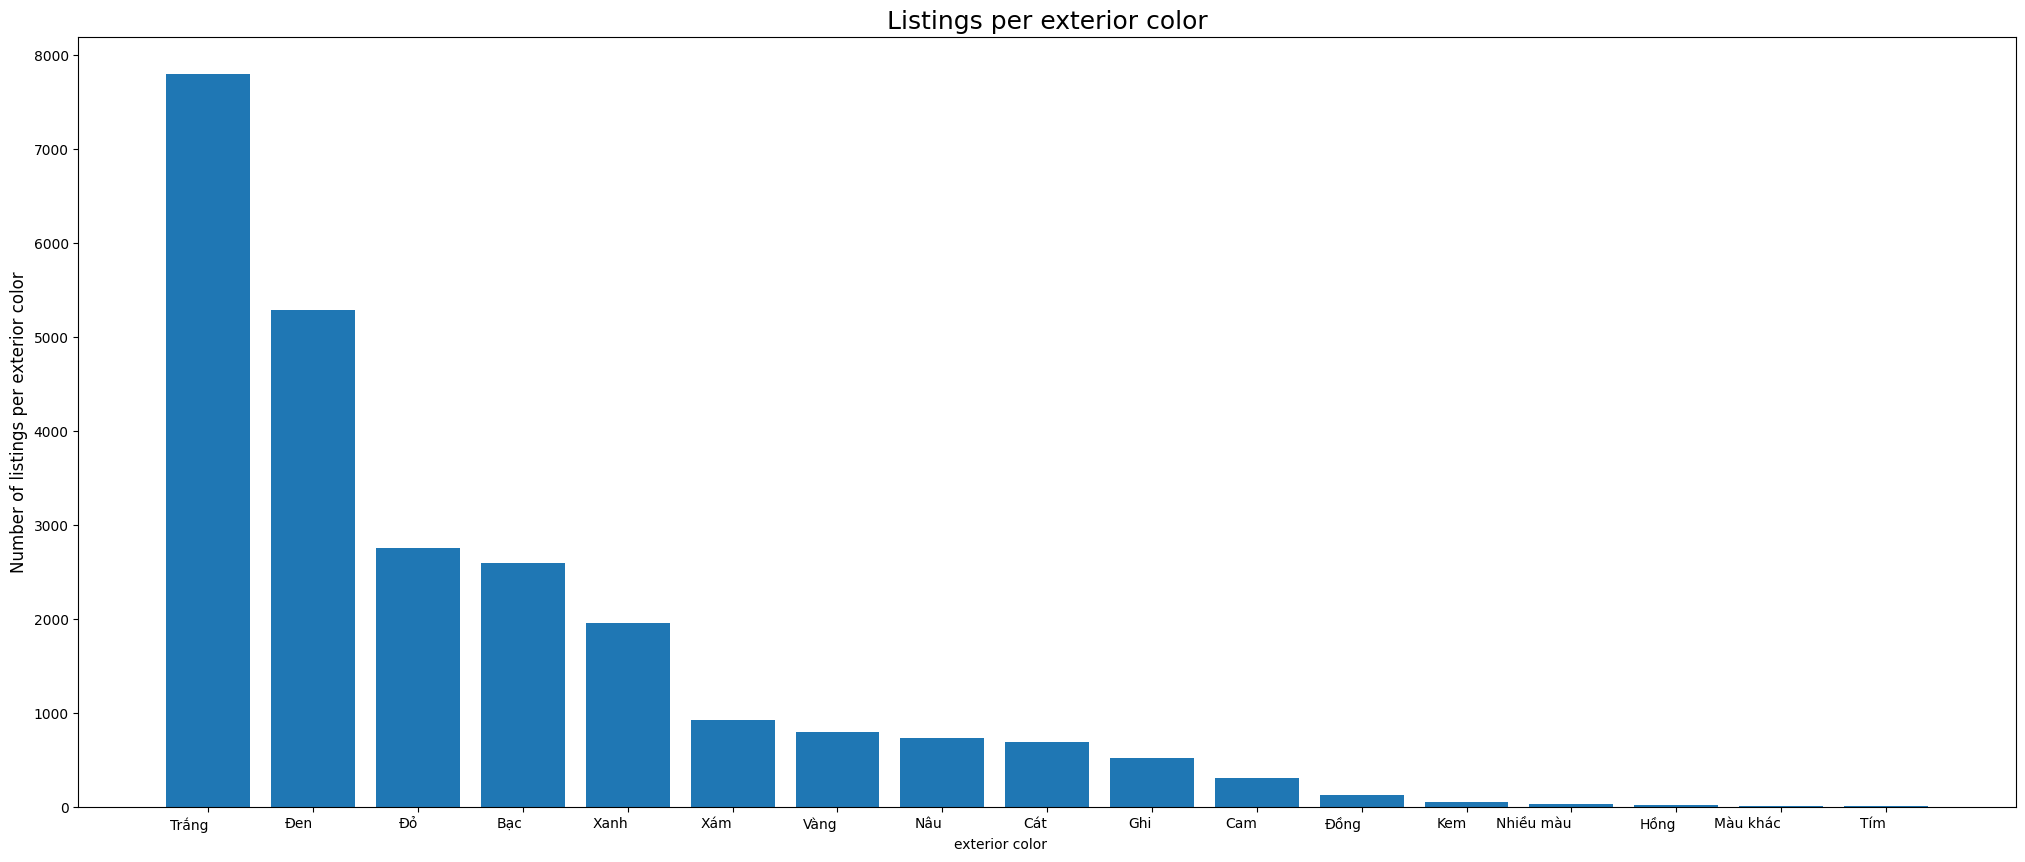

In [ ]:
value_counts = df['exterior_color'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per exterior color', fontsize=12)
plt.xlabel('exterior color', rotation=0, ha='right')
plt.title('Listings per exterior color', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

### Main findings:

From the above charts, the top two colors are Black and White.

## 1.5 Vehicle listings for different interior color

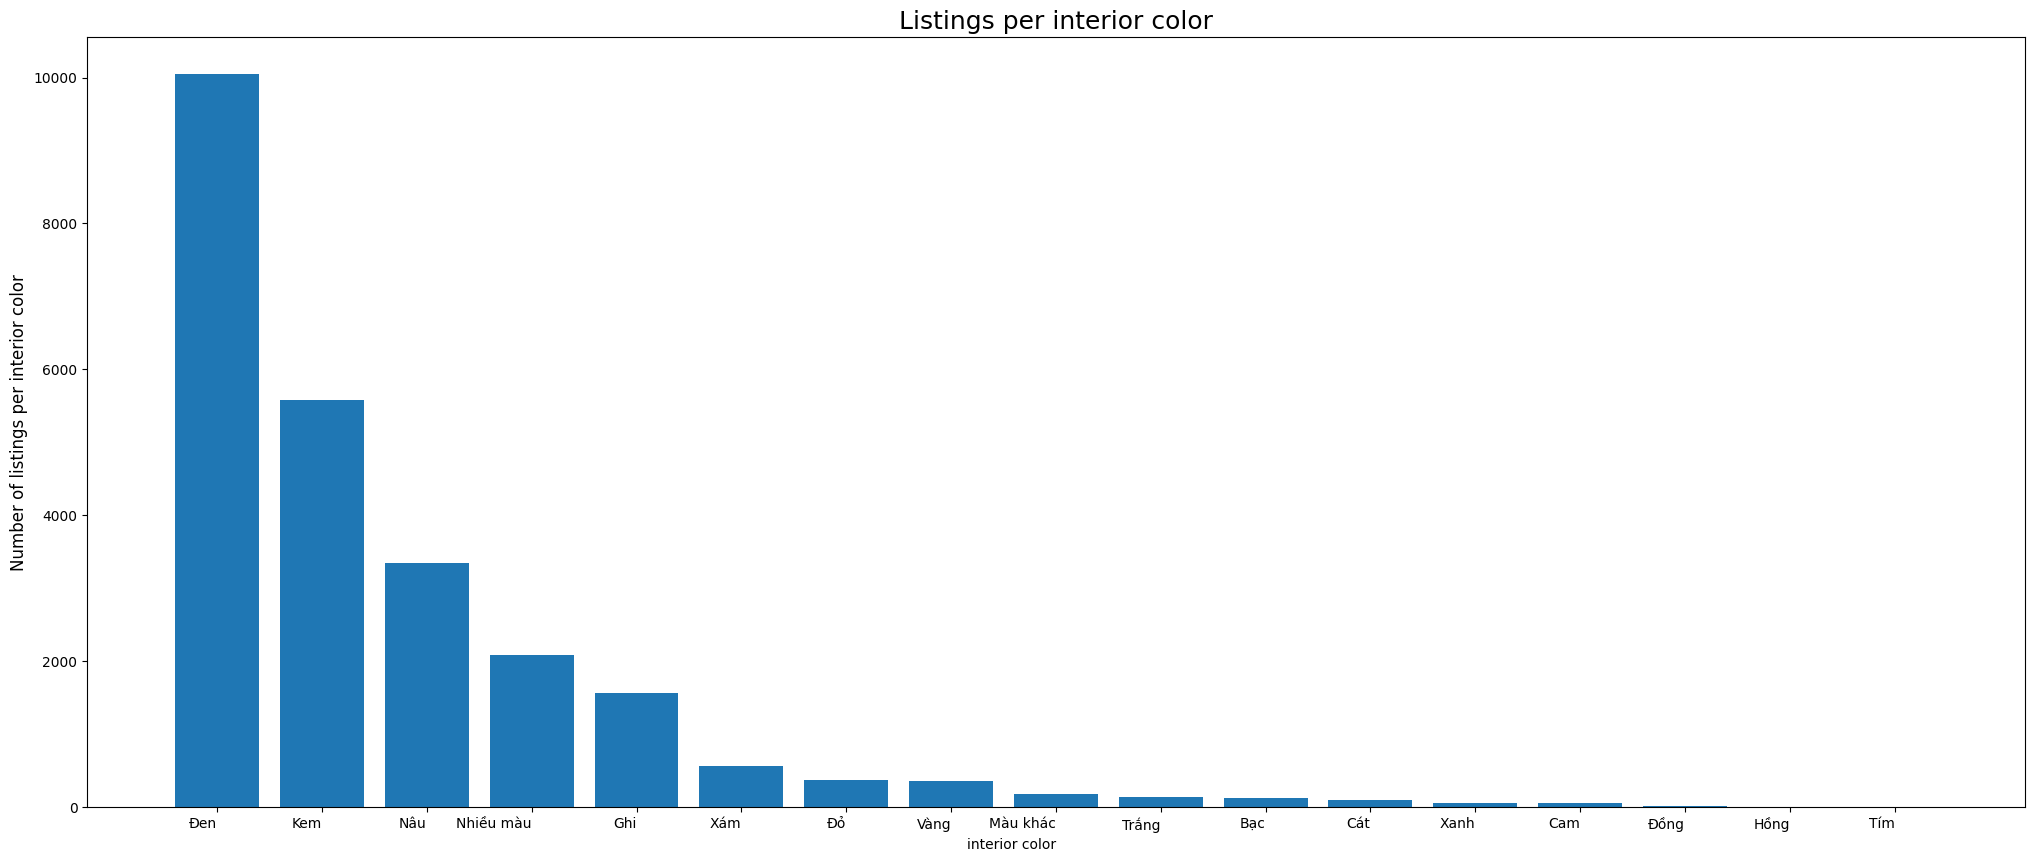

In [ ]:
value_counts = df['interior_color'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per interior color', fontsize=12)
plt.xlabel('interior color', rotation=0, ha='right')
plt.title('Listings per interior color', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

### Main findings:

From the above charts, the top two colors are Black and Cream color.

## 1.6 Vehicle listings for different num seats

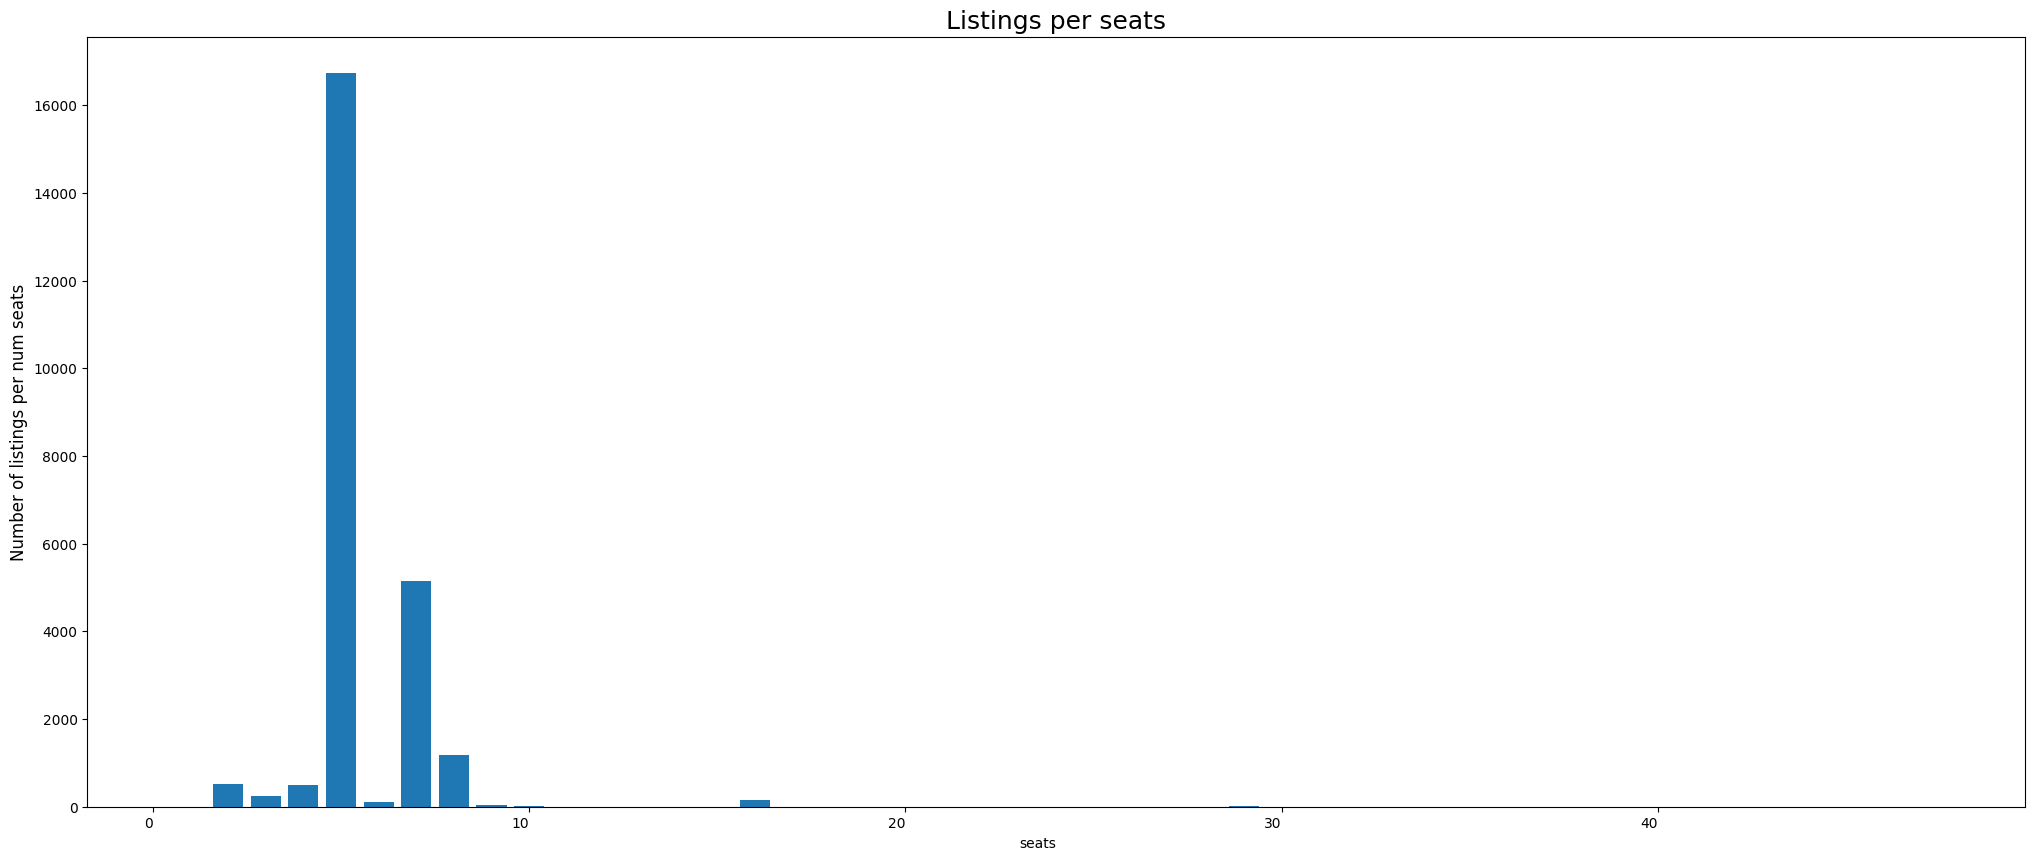

In [ ]:
value_counts = df['num_seats'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per num seats', fontsize=12)
plt.xlabel('seats', rotation=0, ha='right')
plt.title('Listings per seats', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
print("5-seat car and 7-seat car ratio: ", len(df[(df.num_seats==5) | (df.num_seats==7)])/len(df))
print("5-seat car ratio: ", len(df[(df.num_seats==5)])/len(df))
print("7-seat car ratio: ", len(df[(df.num_seats==7)])/len(df))

5-seat car and 7-seat car ratio:  0.8875857310985755
5-seat car ratio:  0.6789091351812021
7-seat car ratio:  0.20867659591737348



### Main findings:

The distribution of vehicle types, as described, appears to be quite distinctive and can significantly contribute to understanding the chart and predicting the model. Specifically, the fact that 5-seater cars account for 67.9% and 7-seater cars account for 20% of the total number of cars is a notable highlight. The substantial concentration on these types of cars can have a considerable impact on the trends and patterns that your model may learn.

The combined total of 5-seater and 7-seater cars at 88% is a significant figure, especially when compared to other car types comprising the remaining percentage. This may provide a crucial perspective on the market's preference for specific car models, and your model may need adjustments or optimizations to accurately reflect these trends.

## 1.7 Vehicle listings for different num doors

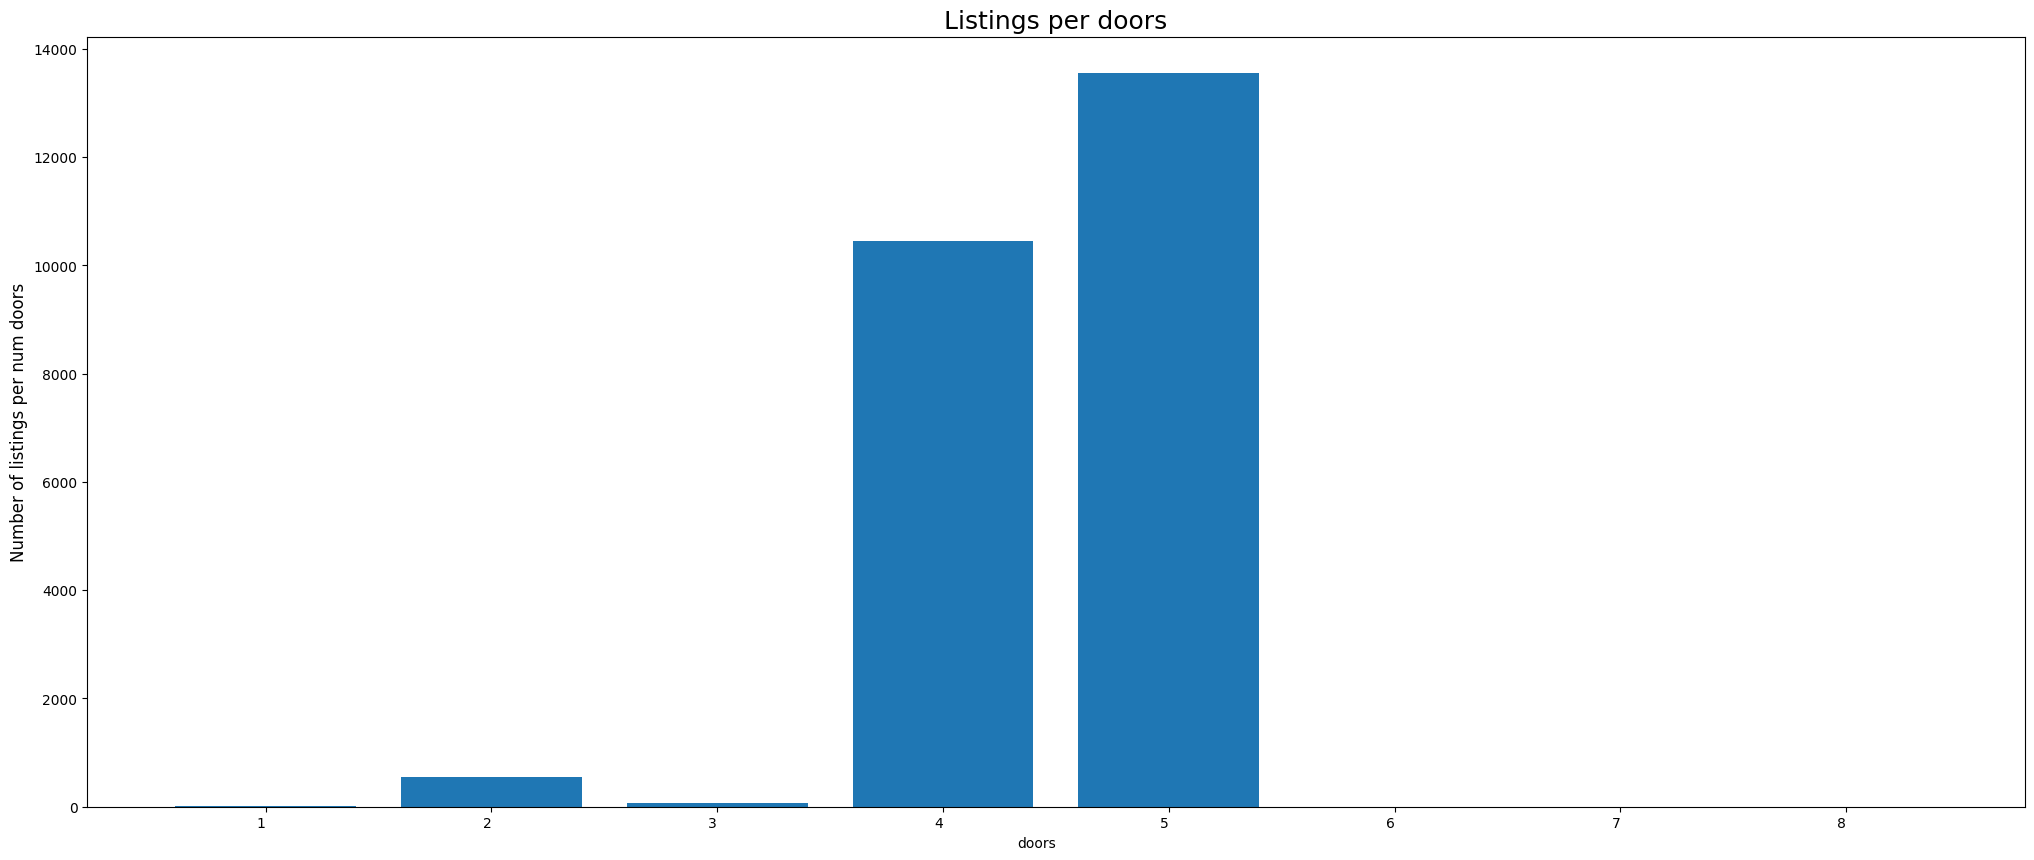

In [ ]:
value_counts = df['num_doors'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per num doors', fontsize=12)
plt.xlabel('doors', rotation=0, ha='right')
plt.title('Listings per doors', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
print("4-door car and 5-door car ratio: ", len(df[(df.num_doors==4) | (df.num_doors==5)])/len(df))
print("4-door car ratio: ", len(df[(df.num_doors==4)])/len(df))
print("5-door car ratio: ", len(df[(df.num_doors==5)])/len(df))

4-door car and 5-door car ratio:  0.9742299419666409
4-door car ratio:  0.4243740107950164
5-door car ratio:  0.5498559311716246


### Main findings:

The data on the distribution among different types of vehicles is distinctive and can significantly contribute to understanding the chart and predicting the model. Specifically, 4-door cars account for approximately 42.43%, while 5-door cars make up 54.98% of the total number of vehicles, which is a notable highlight. The substantial concentration on these types of cars can have an important impact on trends and predictive models.

The combined total of 4-door and 5-door cars at 94.42% is an impressive figure, representing a significant majority in the market.

## 1.8 Vehicle listings for different origin

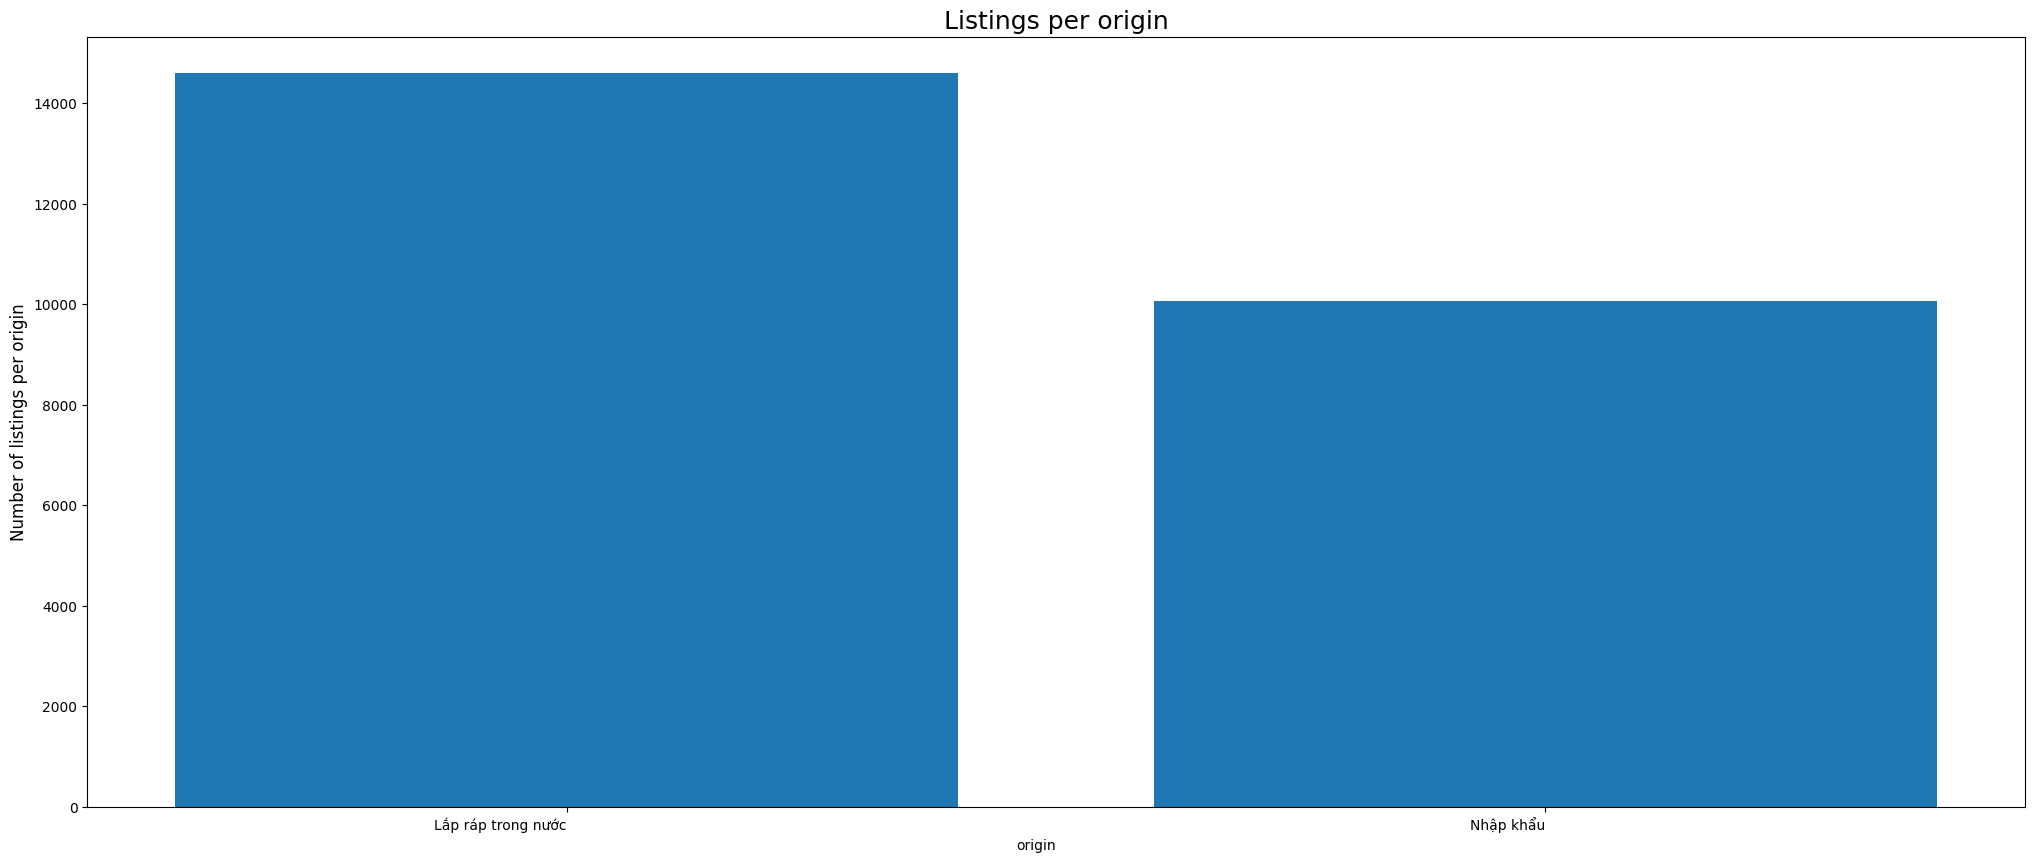

In [ ]:
value_counts = df['origin'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per origin', fontsize=12)
plt.xlabel('origin', rotation=0, ha='right')
plt.title('Listings per origin', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
print("Domestic car ratio: ", len(df[(df.origin=='Lắp ráp trong nước')])/len(df))
print("Imported car ratio: ", len(df[(df.origin=='Nhập khẩu')])/len(df))

Domestic car ratio:  0.5920620104703543
Imported car ratio:  0.4079379895296457


### Main findings:
The rate of domestically assembled cars reached 0.592, while the rate of imported cars was 0.408. This means that domestically assembled cars account for a larger proportion of the auto market than imported cars. These can have some important implications for building machine learning models:

Important Feature: Information about the vehicle's place of manufacture can become an important feature in the model. The model may learn that there is a preference for locally assembled vehicles, and this may influence predictions regarding price, features, or other factors.

## 1.9 Vehicle listings for different transmission

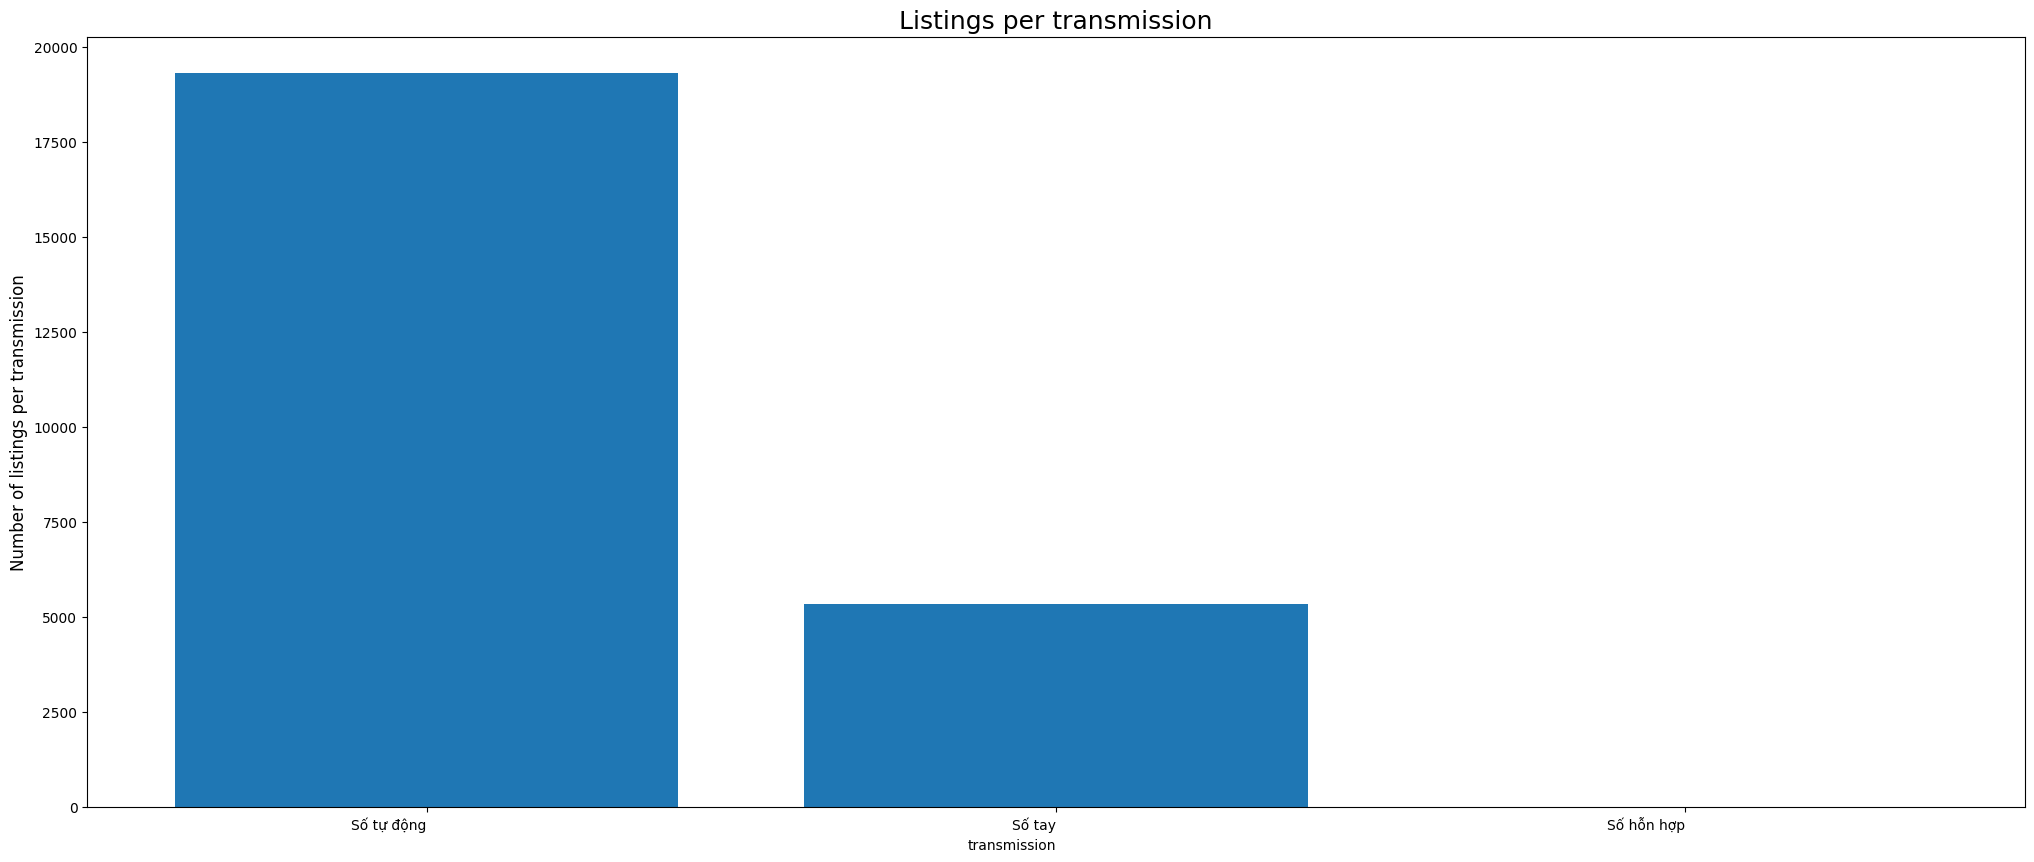

In [ ]:
value_counts = df['transmission'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per transmission', fontsize=12)
plt.xlabel('transmission', rotation=0, ha='right')
plt.title('Listings per transmission', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
print("Automatic number car ratio: ", len(df[(df.transmission=='Số tự động')])/len(df))
print("Manual transmission ratio: ", len(df[(df.transmission=='Số tay')])/len(df))

Automatic number car ratio:  0.7834503469826711
Manual transmission ratio:  0.21650907024877236


### Main findings:

Automatic transmissions account for the majority, 78%, compared to manual and mixed transmissions. Such a significant difference indicates that most vehicles sold are from the year 2010 onwards, and since then, automatic transmissions have become more prevalent in the community compared to manual transmissions.

## 1.10 Vehicle listings for different drivetrain


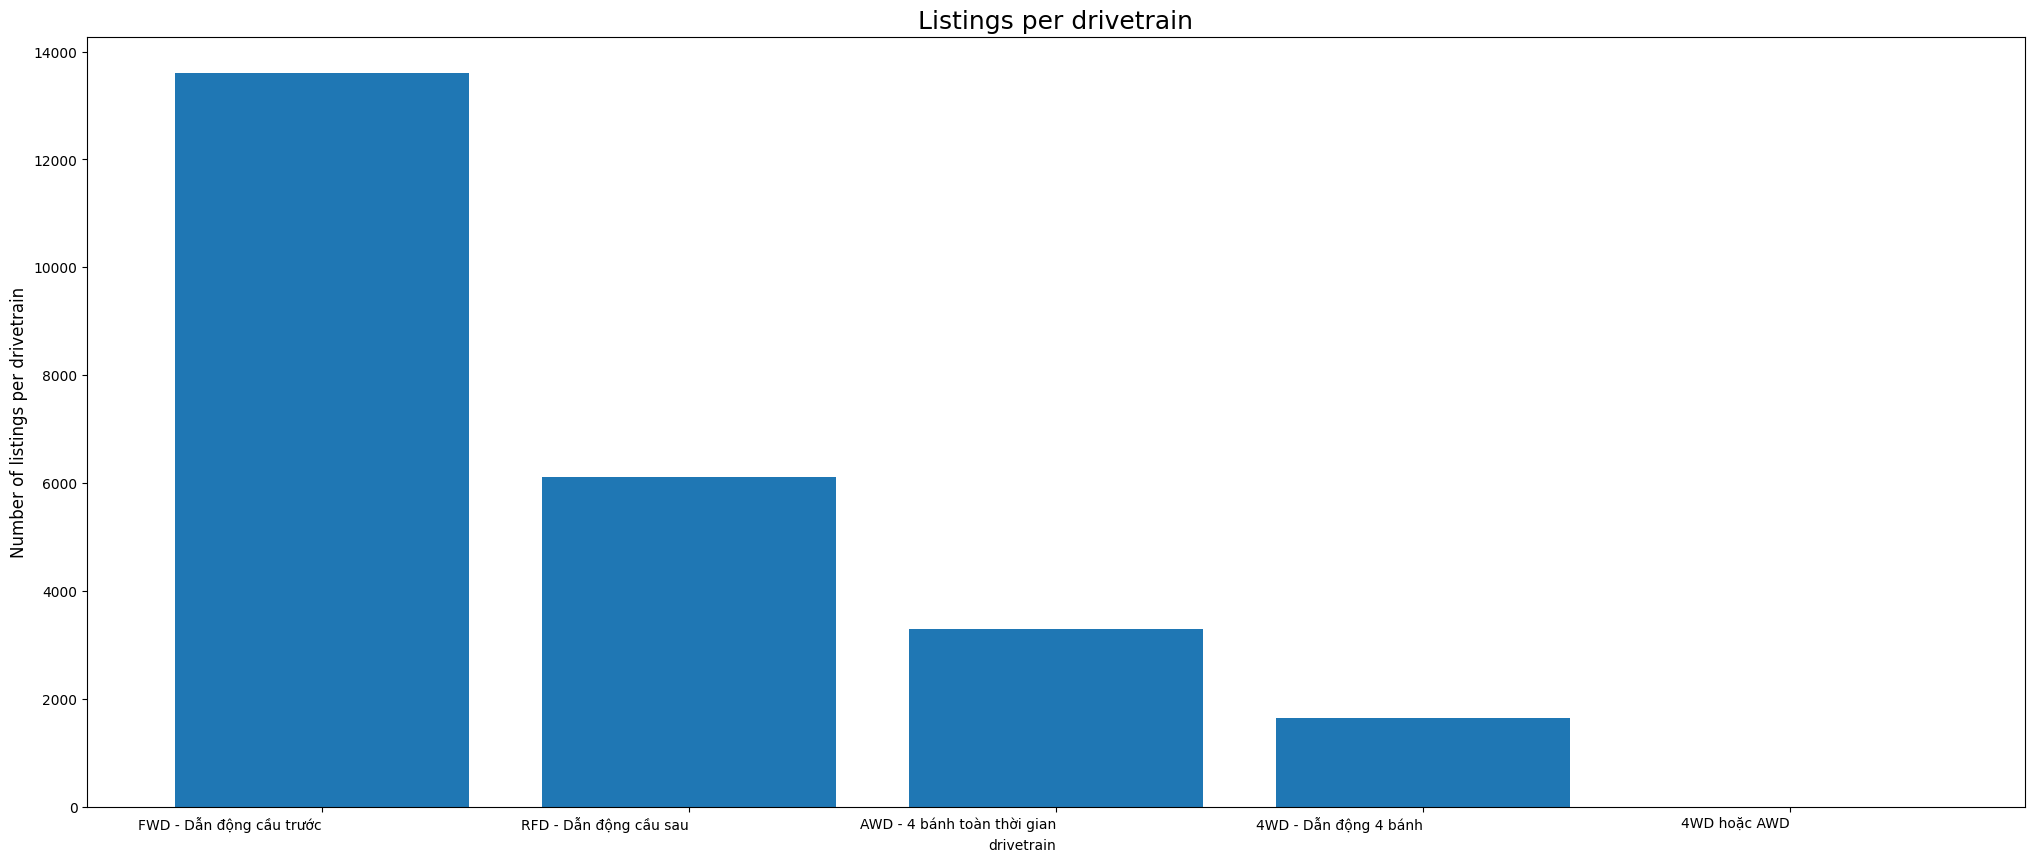

In [ ]:
value_counts = df['drivetrain'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per drivetrain', fontsize=12)
plt.xlabel('drivetrain', rotation=0, ha='right')
plt.title('Listings per drivetrain', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
print("FWD car ratio: ", len(df[(df.drivetrain=='FWD - Dẫn động cầu trước')])/len(df))


FWD car ratio:  0.5517227385252222


### Main findings:

The Front-Wheel Drive (FWD) ratio dominates the majority, accounting for 55% in the dataset of used car prices. This signifies important aspects of the automotive market that could influence predictions of used car prices. The prevalence of Front-Wheel Drive technology, the favoring of FWD, suggests that this technology is widely adopted and favored in the automotive market. This may be attributed to the fact that FWD often provides good energy efficiency, lower production costs, and stable performance under various road conditions compared to other types of drivetrains.

## 1.11 Vehicle listings for different style



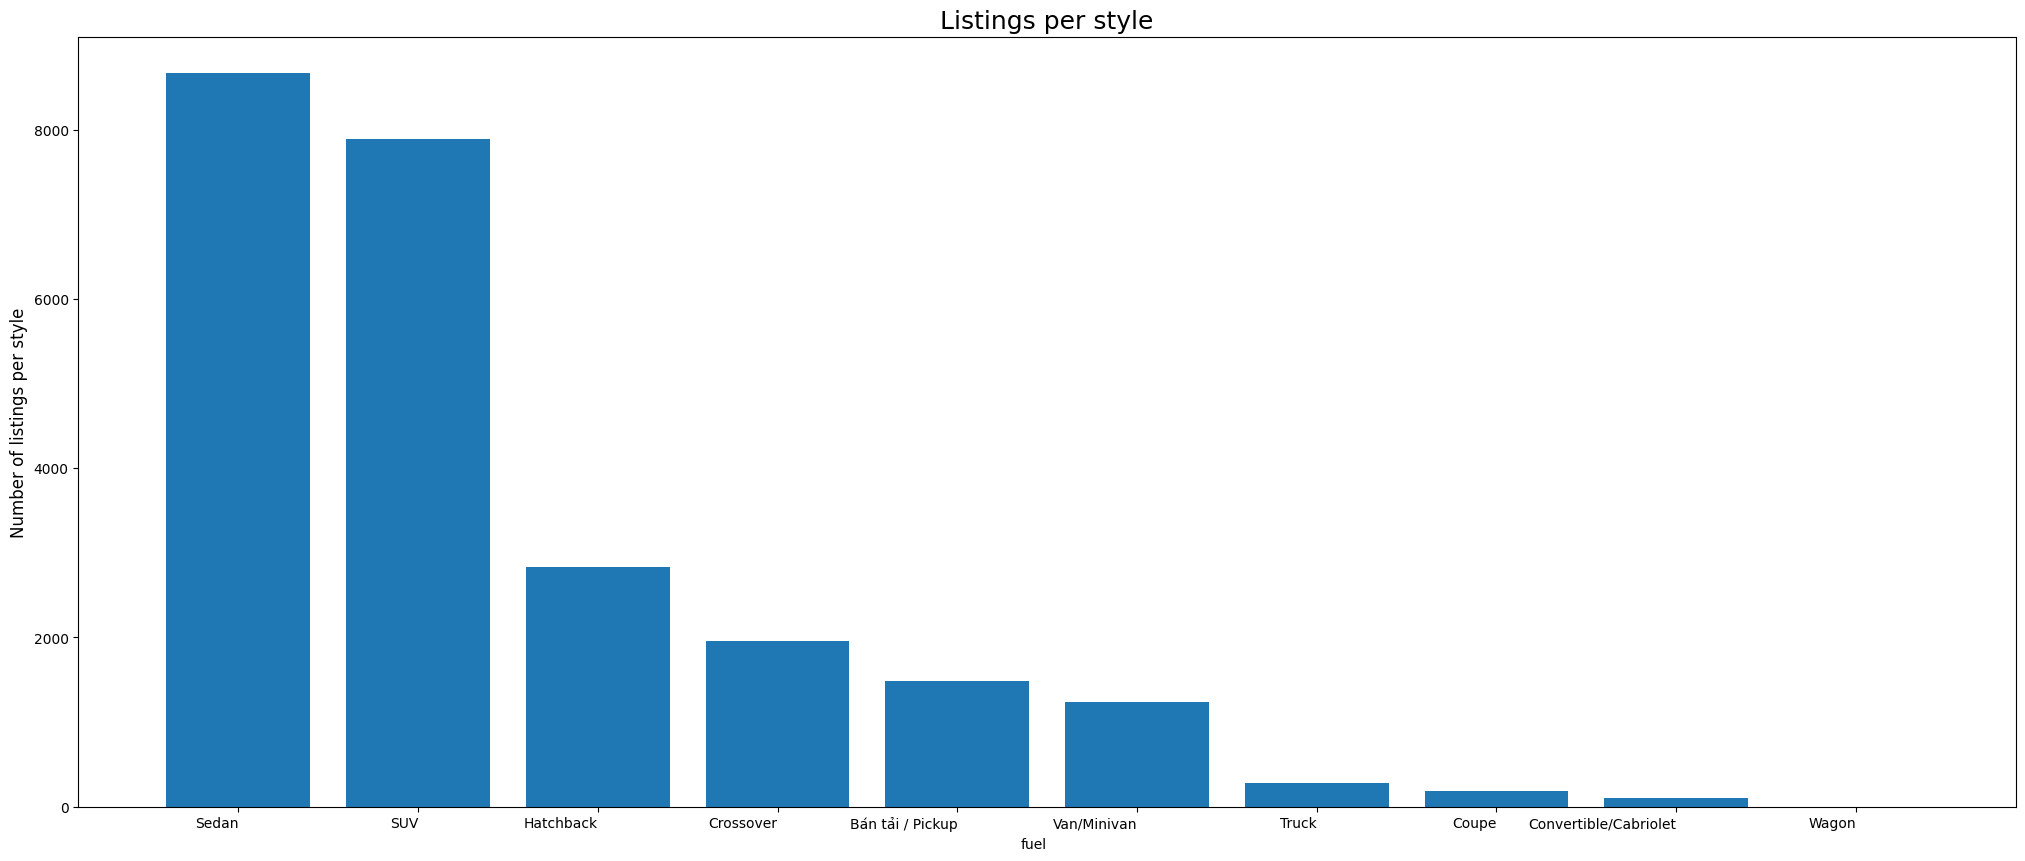

In [ ]:
value_counts = df['style'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per style', fontsize=12)
plt.xlabel('fuel', rotation=0, ha='right')
plt.title('Listings per style', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
print('Ratio Sedan, SUV: ', len(df[(df['style']=='Sedan') | (df['style']=='SUV')])/len(df))

Ratio Sedan, SUV:  0.671928898989489


### Main findings:

The chart illustrates a clear trend with sedans and SUVs accounting for a significant proportion, amounting to 67.2%, of the total number of used cars sold. This may indicate a strong preference among consumers for these two types of vehicles in the used car market.

This observation suggests that sedans and SUVs are not only popular choices but also reflect the diversity and versatility of the market. For consumers, the stability of sedans and the multifunctional, sporty features of SUVs could be crucial factors in their decision-making when purchasing used cars.

## 1.12 Vehicle listings for different fuel and liter


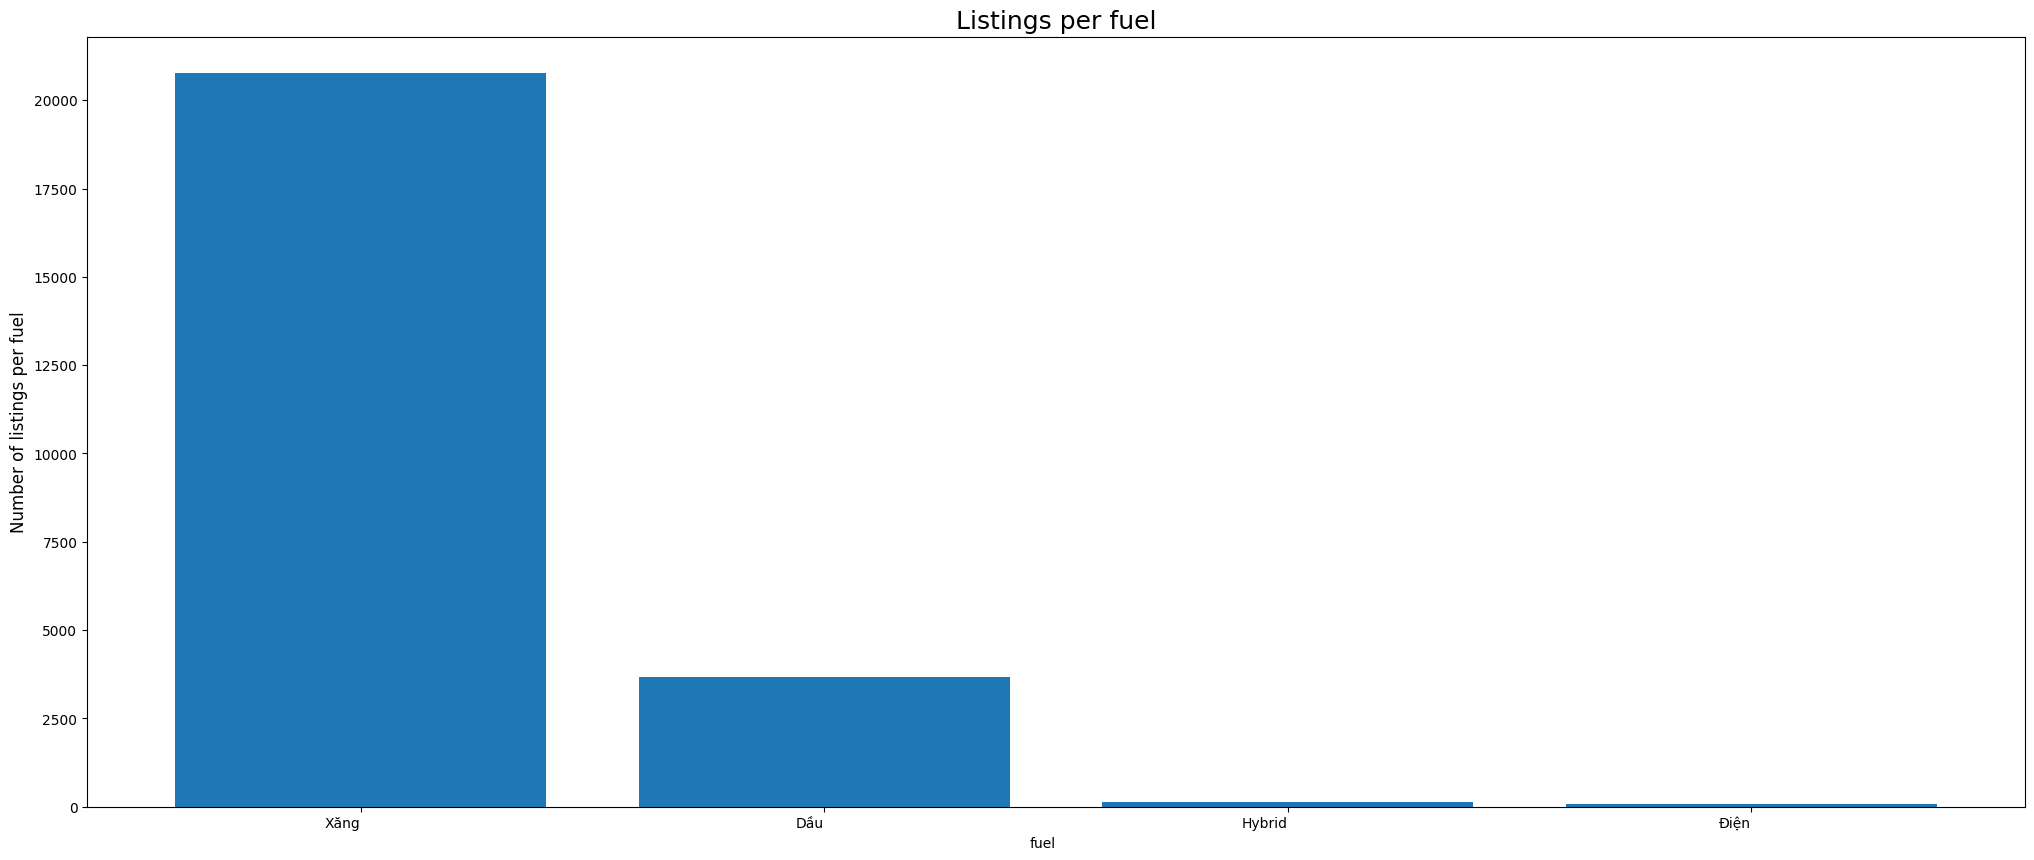

In [ ]:
value_counts = df['fuel'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per fuel', fontsize=12)
plt.xlabel('fuel', rotation=0, ha='right')
plt.title('Listings per fuel', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

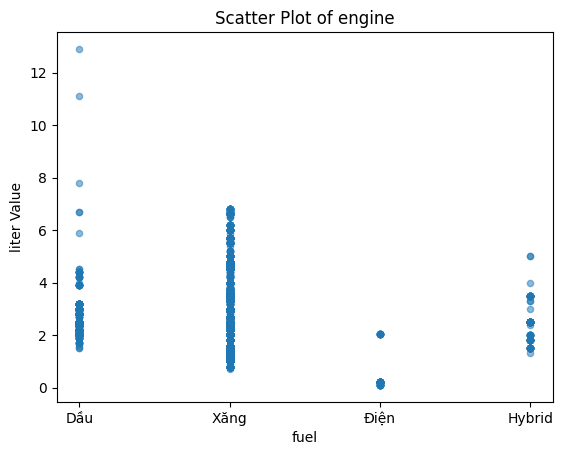

In [ ]:
df.plot.scatter(x='fuel', y='liter', alpha=0.5)
plt.xlabel('fuel')
plt.ylabel('liter Value')
plt.title('Scatter Plot of engine')
plt.show()

### Main findings:
The number of vehicles using gasoline is significantly higher and appears to be dominant compared to vehicles using other fuels such as diesel, especially hybrid and electric cars. The vehicle with the highest fuel consumption is one running on diesel. From this, it can be observed that electric and hybrid vehicles are not yet as prevalent as gasoline-powered vehicles. Gasoline-powered cars still hold the number one market share in Vietnam.

## 1.13 Mileage distribution

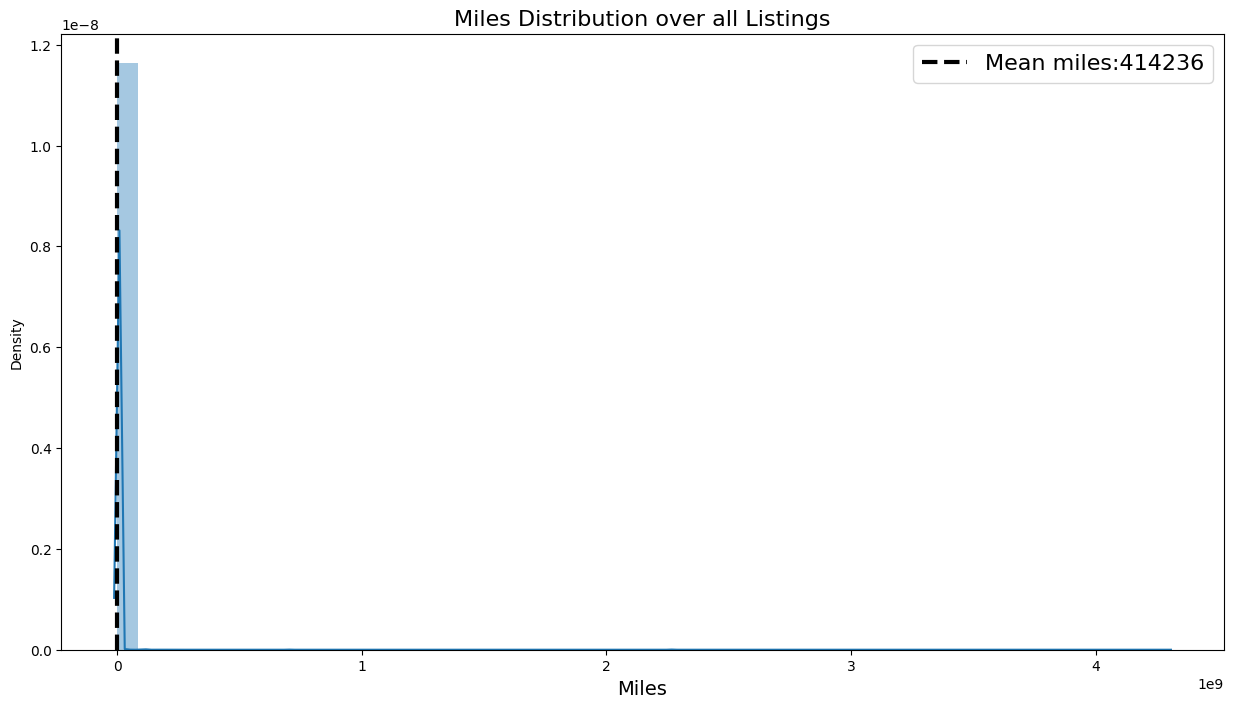

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mileage,kde=True)
plt.xlabel('Miles',fontsize=14)
plt.axvline(df['mileage'].mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(df.mileage)))
plt.title('Miles Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

Main functions:

*   The average mileage is about 414235.7604805 km and the median mileage of used cars is 35000 km
*   The median mileage is much lower. The reason for this is the extremely high mileage outliers in the distribution, which also resulted in the long-tail distribution.

In [ ]:
print('mean: ', df['mileage'].mean())
print('median: ', df['mileage'].median())

mean:  414235.7604805
median:  35000.0


In [ ]:
df1 = df[df['mileage'] <= 500000]

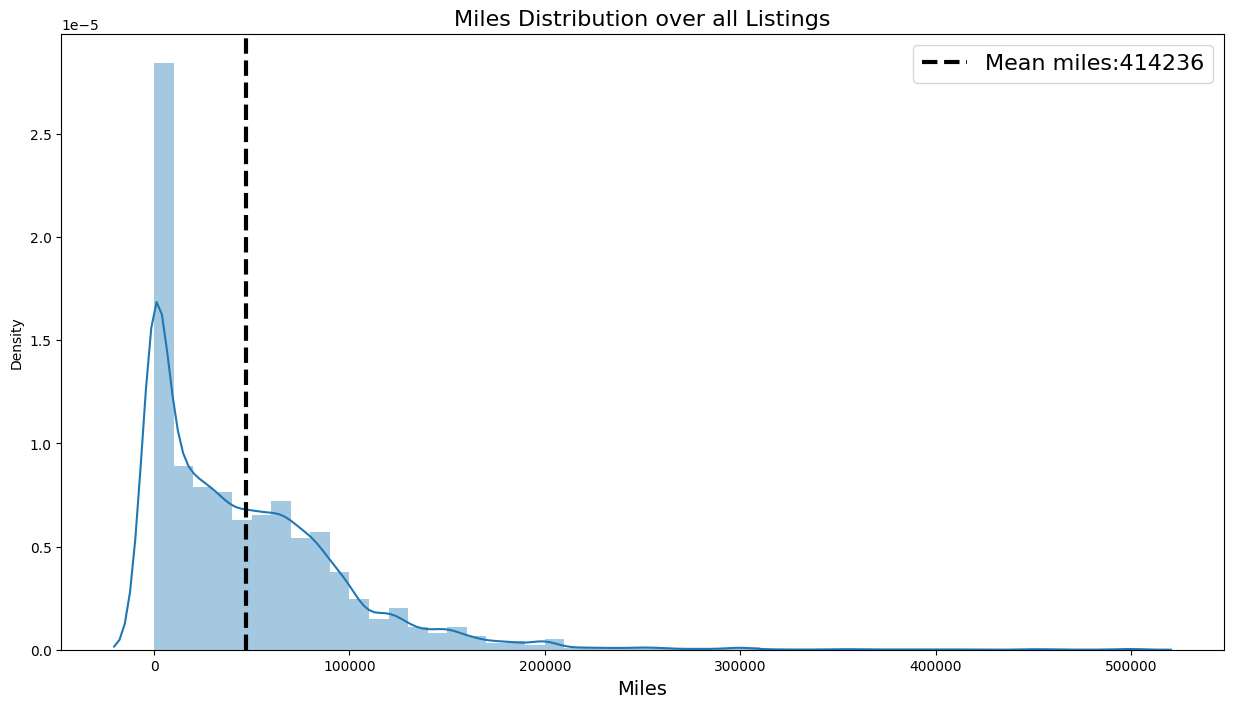

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df1.mileage,kde=True)
plt.xlabel('Miles',fontsize=14)
plt.axvline(df1['mileage'].mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(df.mileage)))
plt.title('Miles Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [ ]:
print('Ratio 0 mileage: ', len(df[(df['mileage']==0) | (df['style']=='SUV')])/len(df))

Ratio 0 mileage:  0.4880483746601193


Based on our observations with a mileage limit of under 500,000 km, there are several key points to note:

* Significant Number of Newly Acquired Cars with Zero Mileage: Nearly half (48.8%) of the total number of used cars sold fall into this category, indicating a strong trend of purchasing new cars that have not been used extensively.

* Decreasing Distribution of Mileage Based on Distance: The decreasing trend in the distribution of mileage, especially within the group of cars with zero mileage, may reflect consumer preference for new or lightly used vehicles.

* Outliers and Extremely Large Boundary Data: The presence of large boundary values (exceeding 4x10^9 km) and the appearance of outlier data points suggest the existence of special cases or noise in the dataset, requiring careful handling and scrutiny.

## 1.14 Price distribution

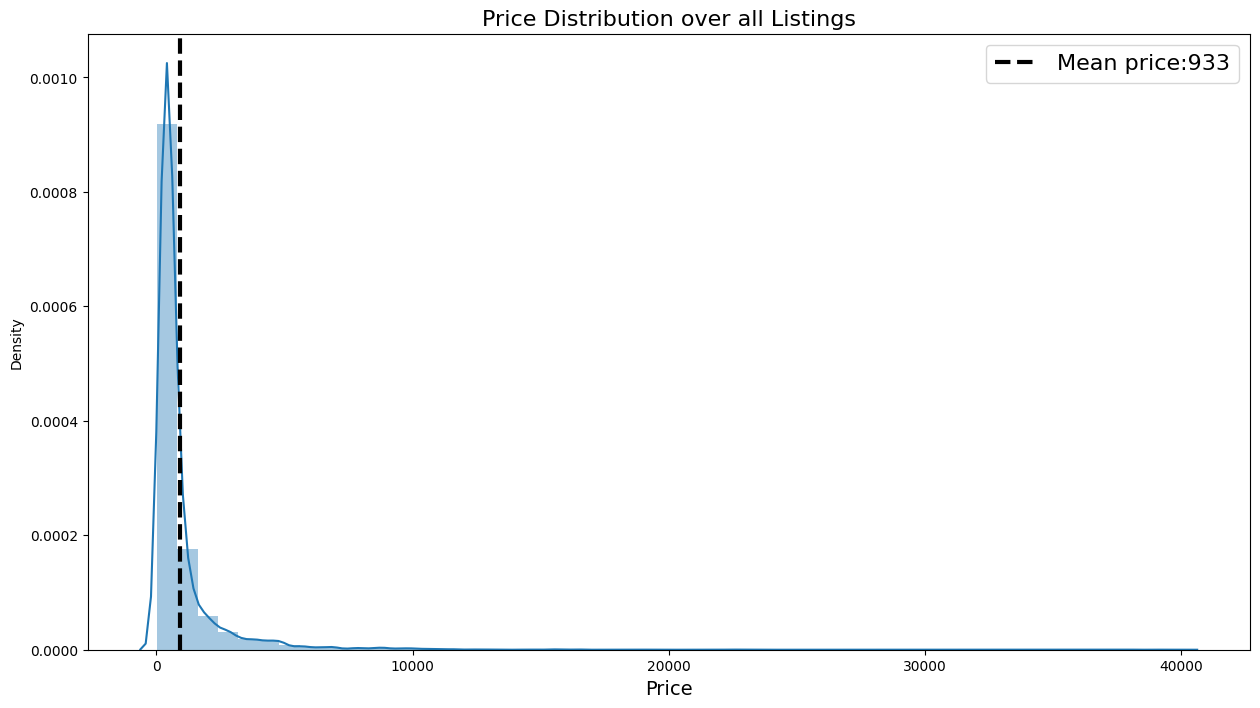

In [ ]:
# look at miles overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.price,kde=True)
plt.xlabel('Price',fontsize=14)
plt.axvline(df.price.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(df.price)))
plt.title('Price Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [ ]:
print('mean: ', df['price'].mean())
print('median: ', df['price'].median())

mean:  932.9567387687188
median:  496.0


Main functions:

* The average price of used cars is approximately 932.96 million dong, while the median price stands at 496 million dong.

* The price distribution exhibits characteristics of a long-tail distribution, and notably, the median mileage is considerably lower. This is a common pattern in price/value/cost distributions, likely influenced by the presence of extremely high mileage outliers. In scenarios where Price serves as the response variable in prediction, log transformation is typically applied to normalize the distribution.


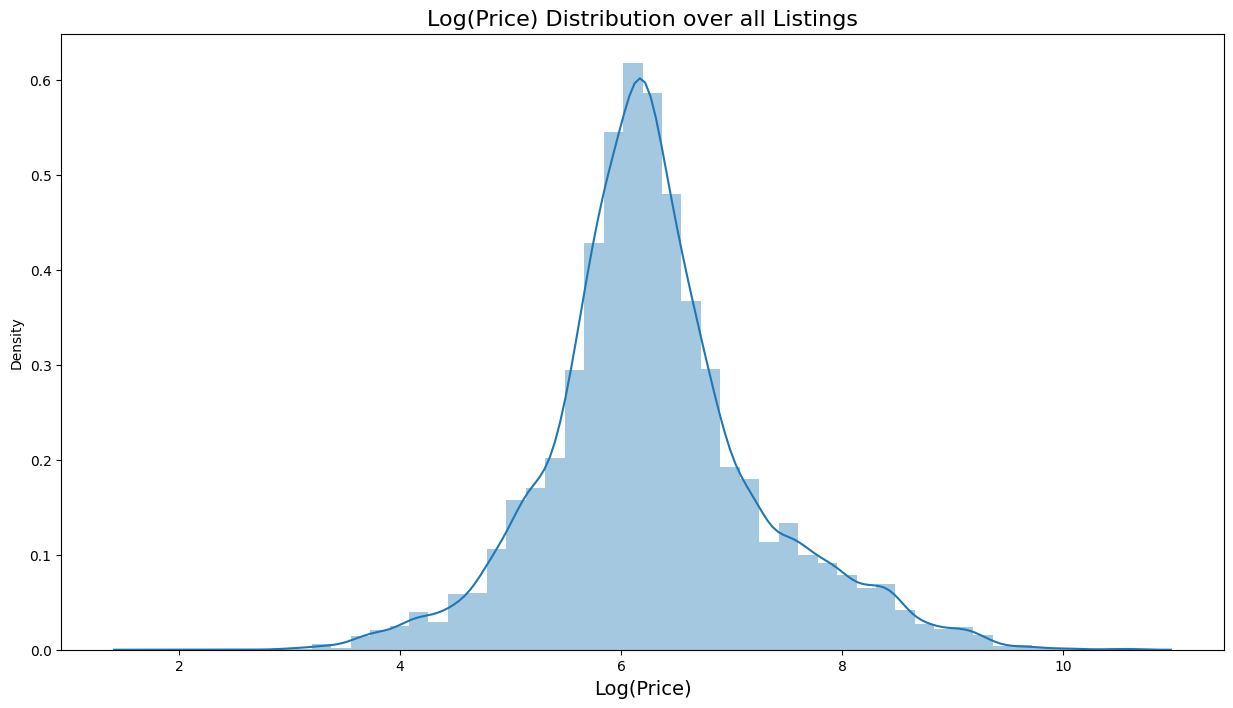

In [ ]:
# log transformation for price.
# After the transformation, the distribution is more like a normal distribution
plt.figure(figsize=(15,8))
log_price = np.log(df.price)
sns.distplot(log_price,kde=True)
plt.xlabel('Log(Price)',fontsize=14)
plt.title('Log(Price) Distribution over all Listings',fontsize=16)
plt.show()

# **2. How price is related to other variables**

## 2.1 How the model year affect the price?

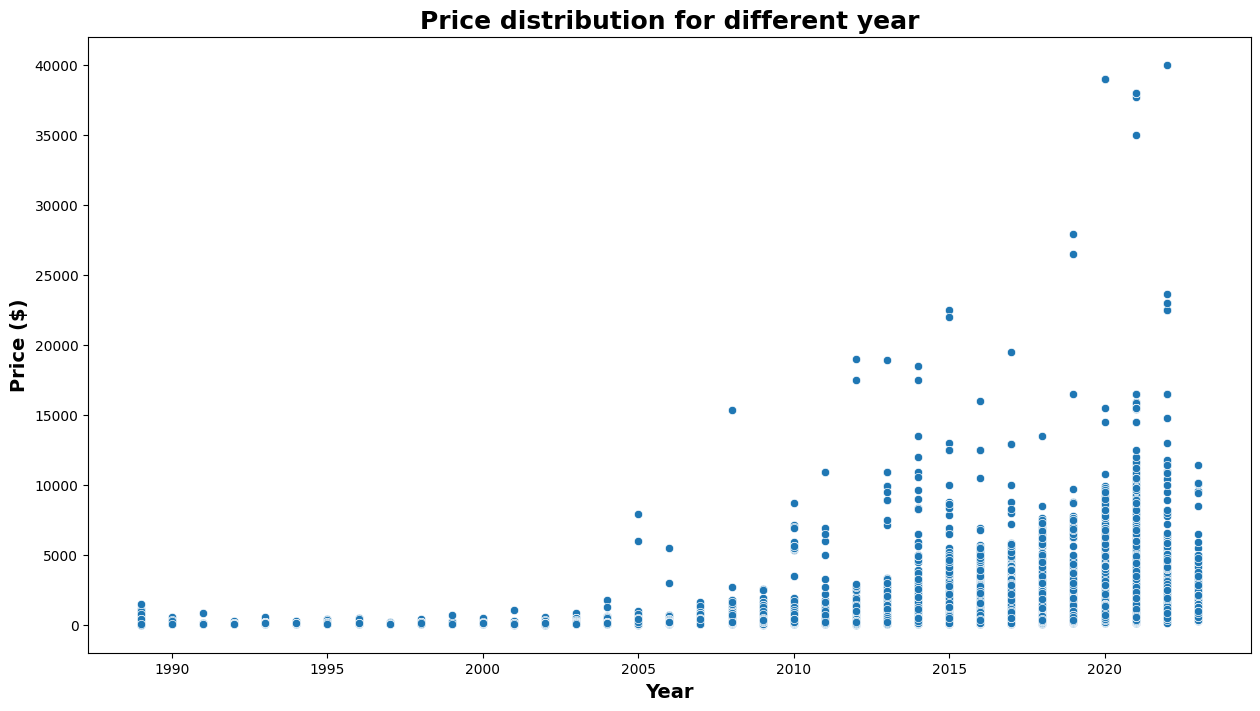

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='year',y='price',data=df)
plt.ylabel('Price (Dong)',fontsize=14,fontweight="bold")
plt.xlabel('Year',fontsize=14,fontweight="bold")
plt.title('Price distribution for different year',fontsize=18,fontweight="bold")
plt.show()

The above plots show that as the model year increase, the mean price is increasing and the range is also expanding. This is because as the years go by, more car models appear and more and more car buyers want to resell them.

## 2.2 How does the automaker impact price?




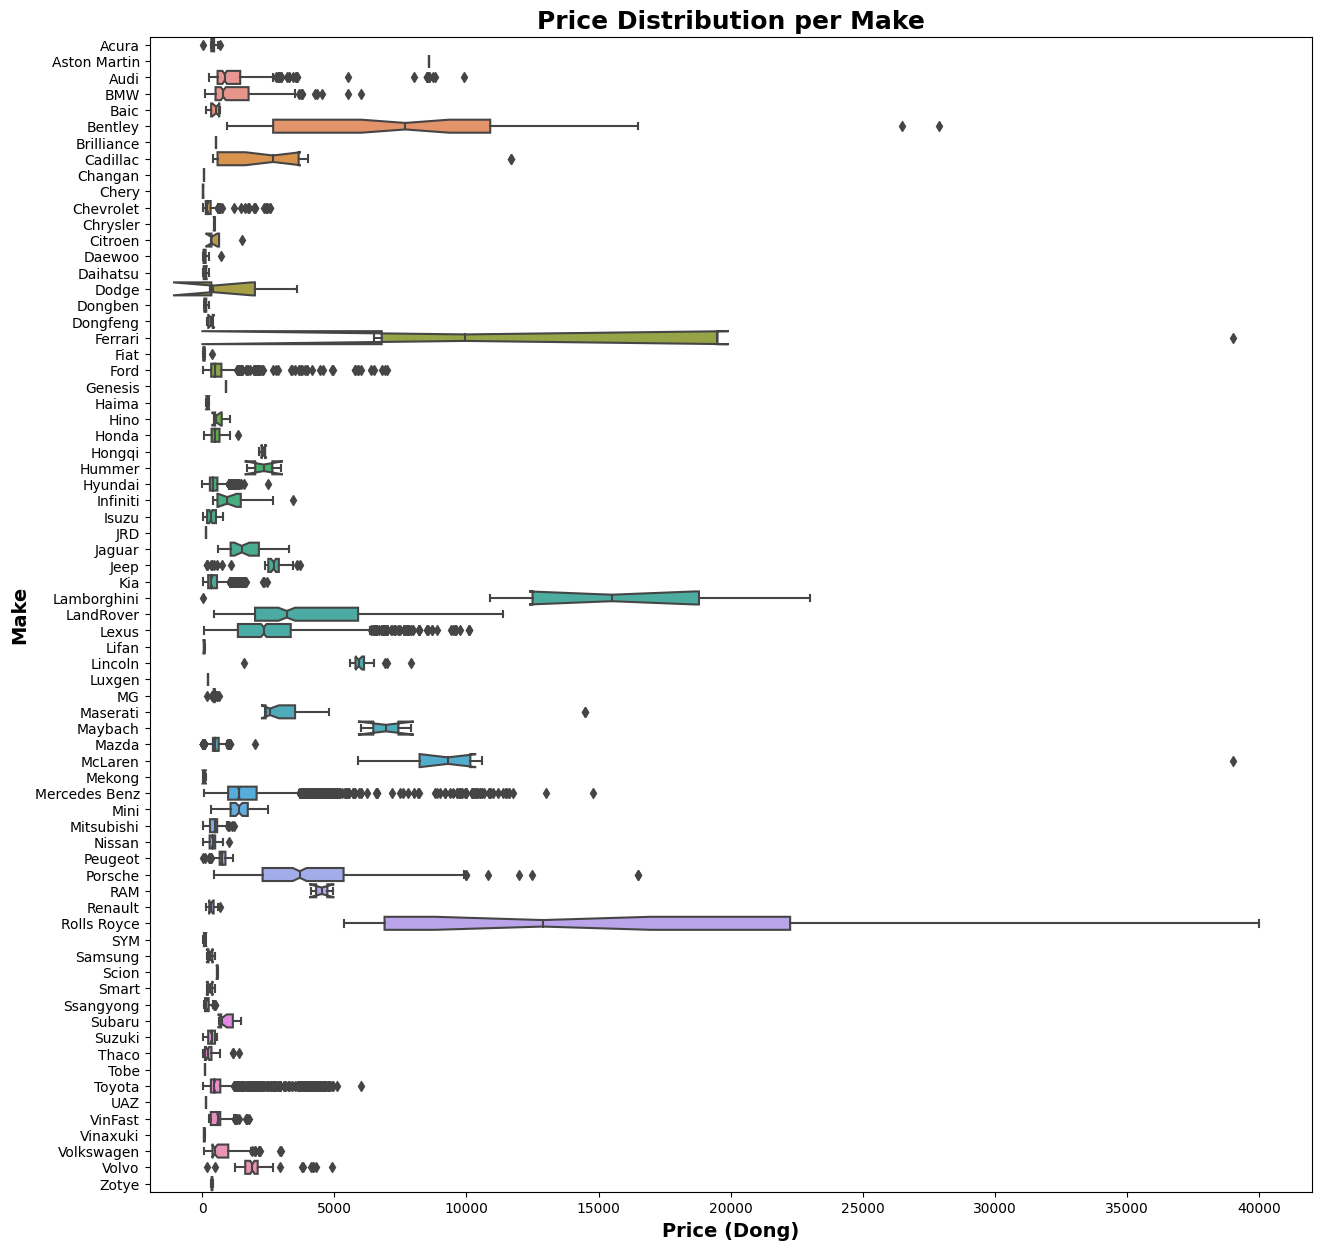

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
sns.boxplot(x='price',y='make',data=df,
            order=sorted(df.make.unique()),notch=True,orient='h')
plt.xlabel('Price (Dong)',fontsize=14,fontweight="bold")
plt.ylabel('Make',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Make',fontsize=18,fontweight="bold")
plt.show()

* The brands of used cars have a large impact on resell price. Some luxury brands such as Lamborghini, Bentley, Ferrari, Rolls-Royce, have extreme high prices compared to other brands.
* Automaker will make a great impact on predicting resell price especially when predicing these large extreme outliers. However, lots of algorithms can't deal with outliers well enough. Tree-based ensemble models are robust to outliers and models such as xgboost will be considered when predicting the resell price.

## 2.3 How will the `origin` impact resale price?

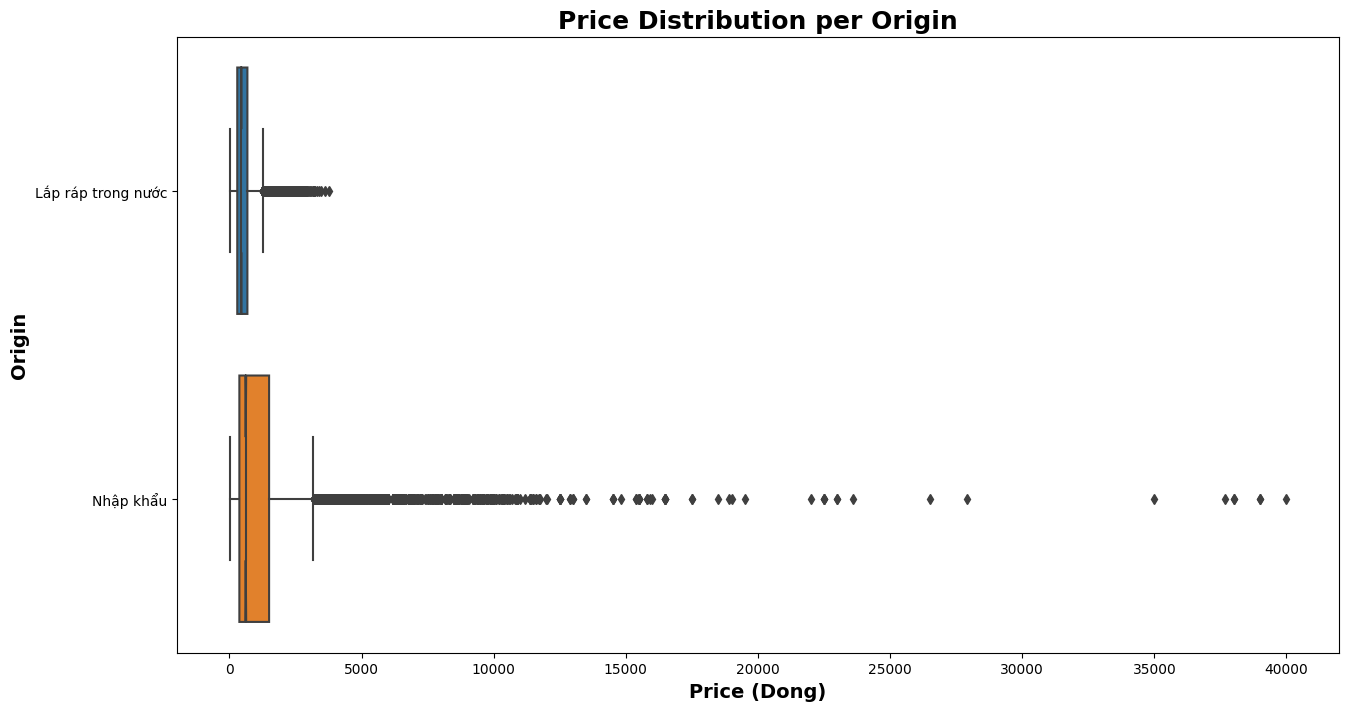

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(x='price',y='origin',data=df,
            order=sorted(df.origin.unique()),notch=True,orient='h')
plt.xlabel('Price (Dong)',fontsize=14,fontweight="bold")
plt.ylabel('Origin',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Origin',fontsize=18,fontweight="bold")
plt.show()

We see that imported cars often have higher prices than domestically assembled cars

## 2.3 How will the style impact resale price?


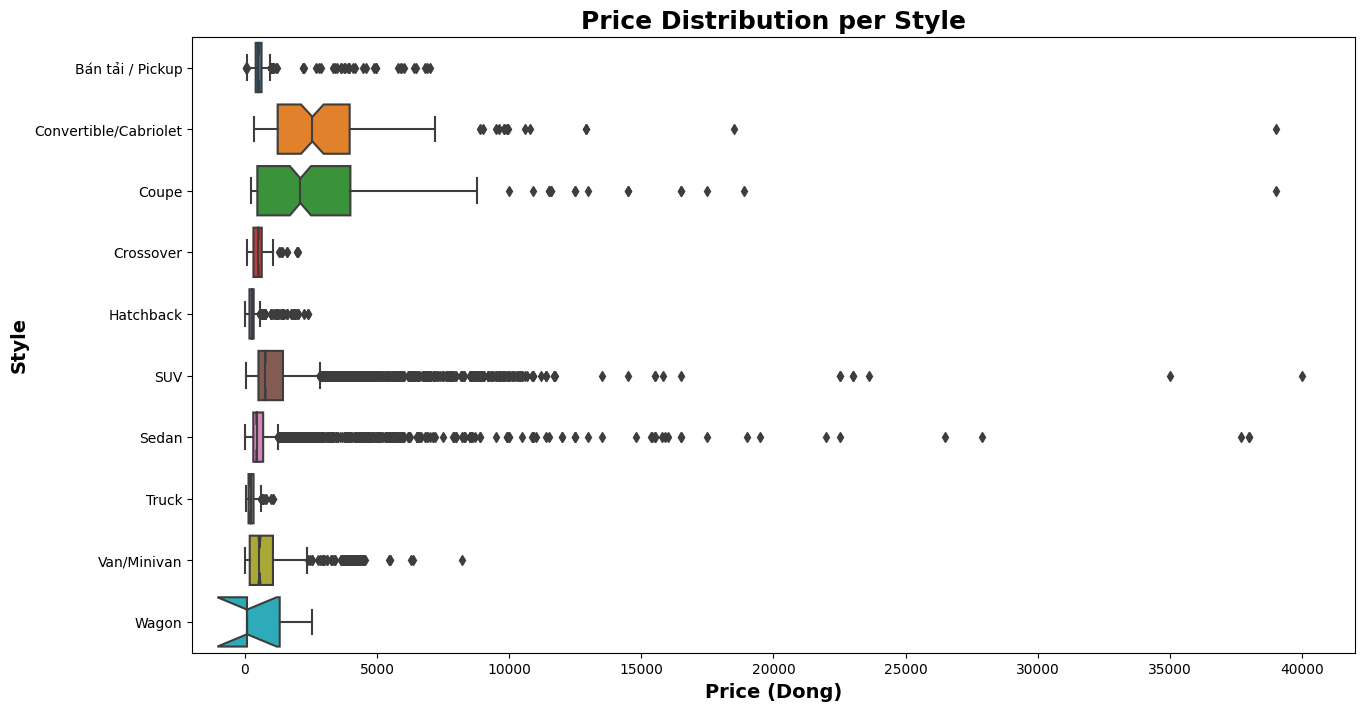

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(x='price',y='style',data=df,
            order=sorted(df['style'].unique()),notch=True,orient='h')
plt.xlabel('Price (Dong)',fontsize=14,fontweight="bold")
plt.ylabel('Style',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Style',fontsize=18,fontweight="bold")
plt.show()


* The price distribution of sedans and SUVs is the widest, as they represent the largest portion in the dataset. The prices are distributed extensively across various ranges, reflecting the significant presence of sedans and SUVs.

* Coupes and Convertibles, on the other hand, constitute a small portion in the dataset with price distributions mainly below 20 billion VND. However, there are two outlier data points that exceed the typical price range, reaching nearly 40 billion VND.

* Trucks and Crossovers comprise a moderate quantity, but their price distribution is the narrowest, ranging from around 100 million VND to below 1 billion VND.

## 2.4 How will the num seats impact resale price?


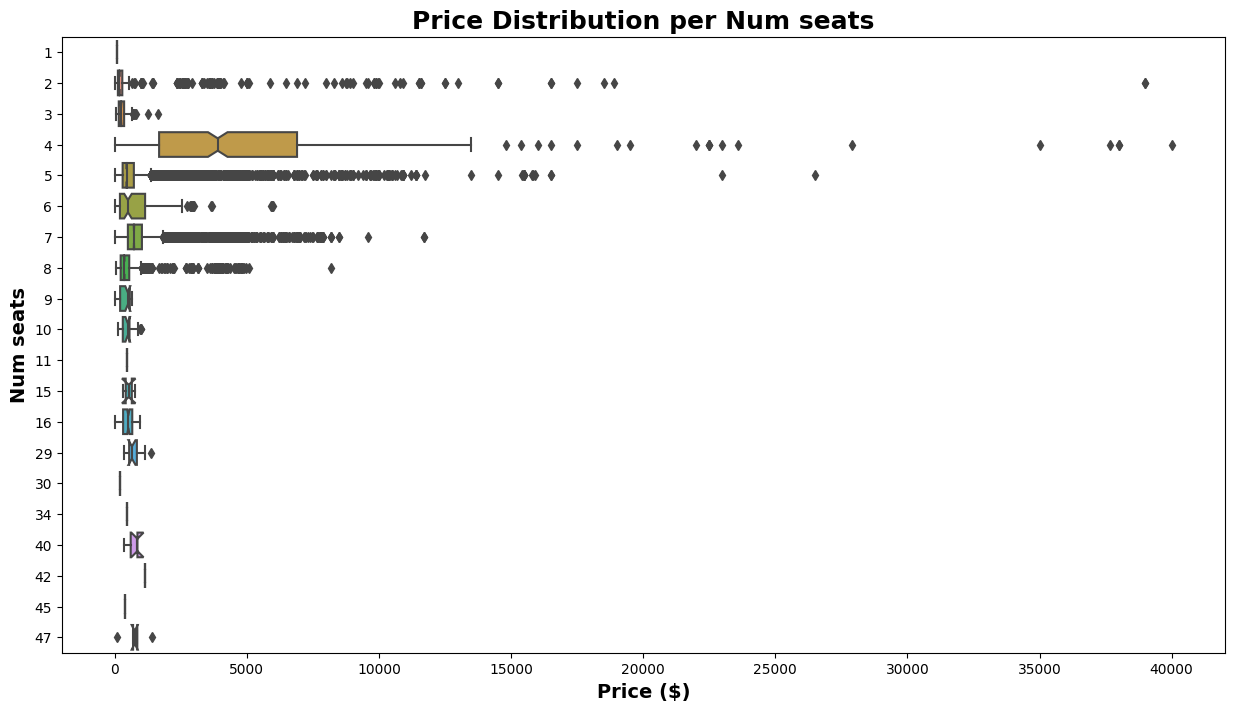

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(x='price',y='num_seats',data=df,
            order=sorted(df['num_seats'].unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Num seats',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Num seats',fontsize=18,fontweight="bold")
plt.show()

* From the chart, we see that 4-seat cars have the highest value. Cars with 9 seats or more will have a lower value compared to cars with 2 to 8 seats. This is due to the market demand of users buying cars with fewer seats than cars with 9 seats or more.

## 2.5 How will the transmission impact resale price?


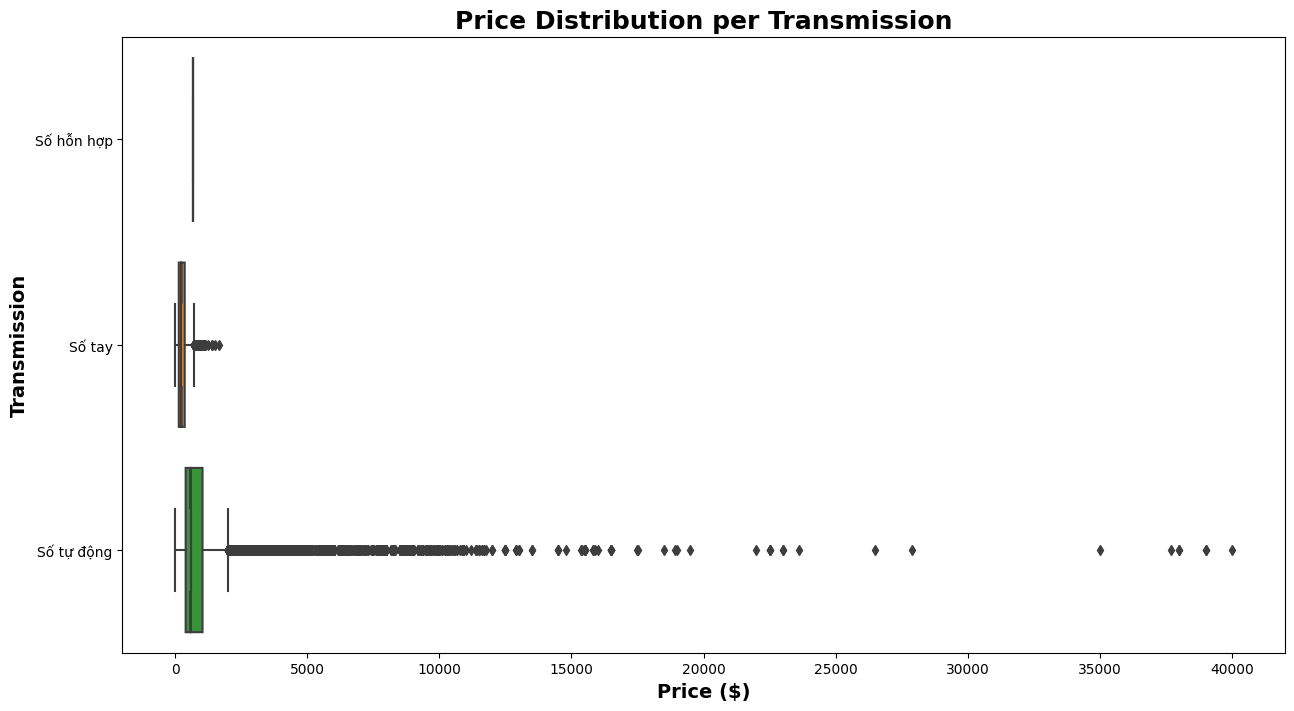

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(x='price',y='transmission',data=df,
            order=sorted(df['transmission'].unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Transmission',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Transmission',fontsize=18,fontweight="bold")
plt.show()

Automatic cars cost the most and have the largest price range

## 2.6 How will the `mileage` impact resale price?

In [ ]:
df1 = df[df['mileage'] <= 50000000]

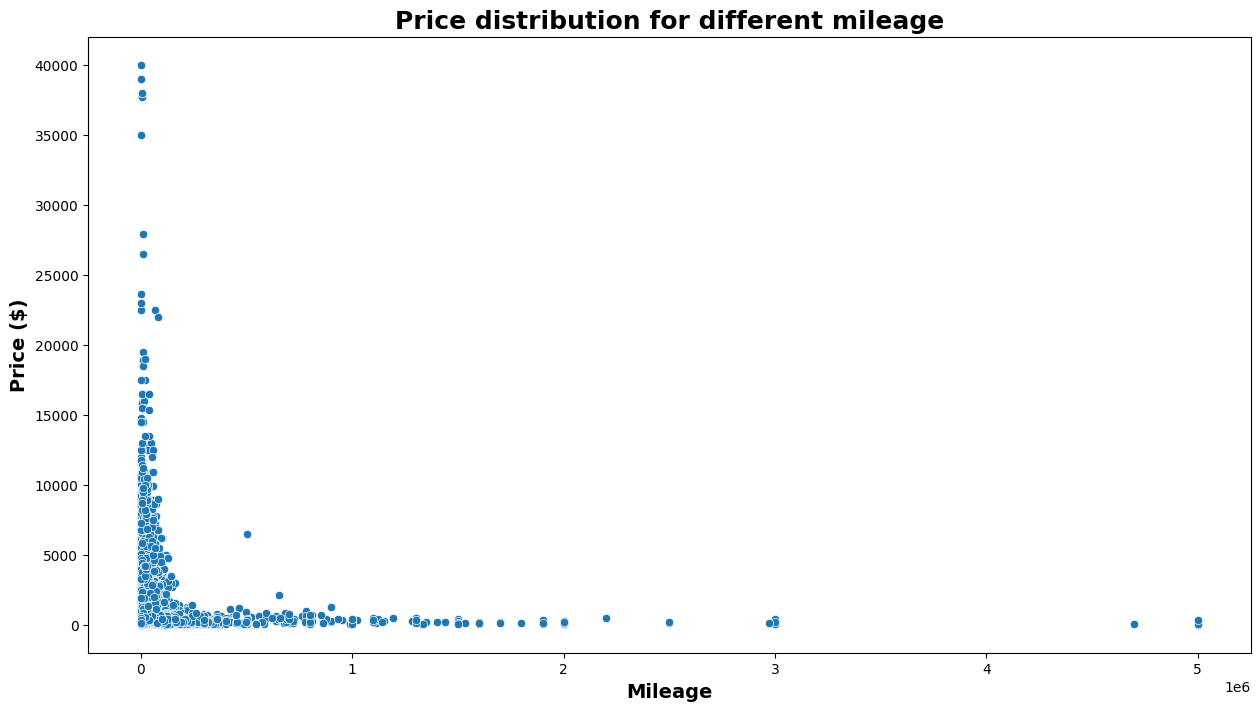

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='mileage',y='price',data=df1)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('Mileage',fontsize=14,fontweight="bold")
plt.title('Price distribution for different mileage',fontsize=18,fontweight="bold")
plt.show()

From the above plot, we can conclude that there is a decreasing trend of price when the mileage increases.

## 2.7 How will the `fuel` impact resale price?



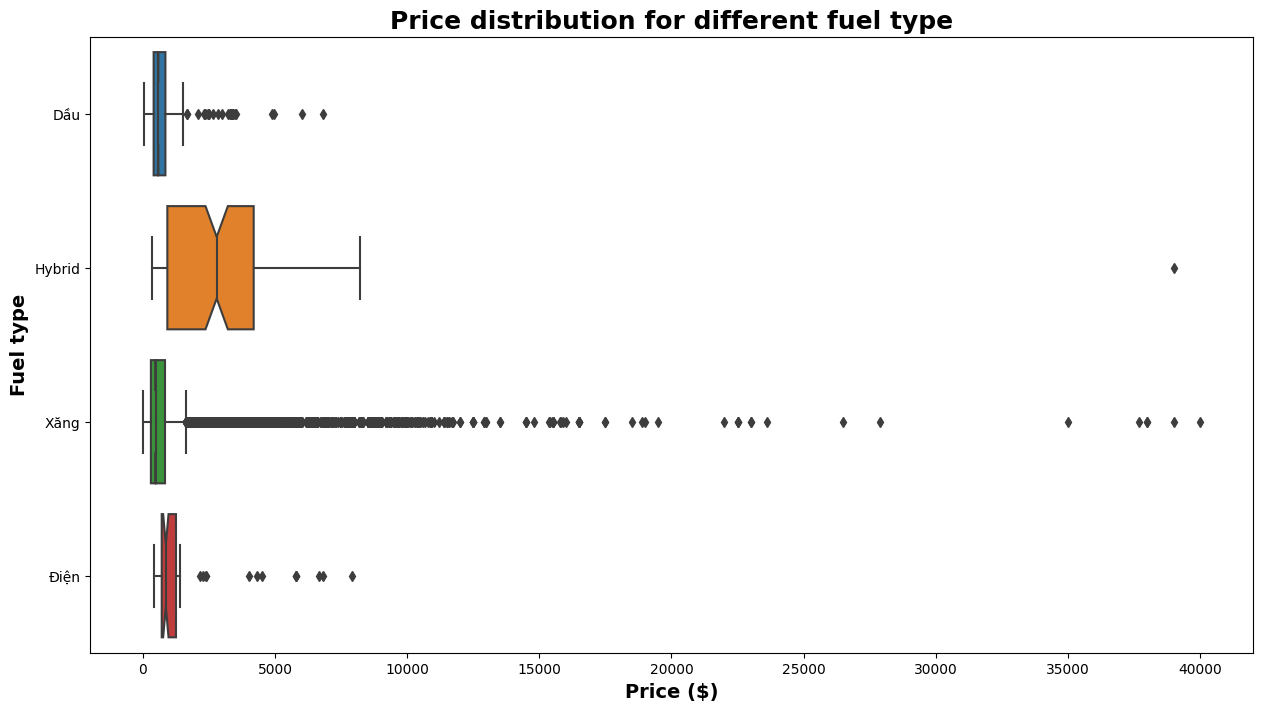

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
# in order to better visualize, I will limit the price under 75000
sns.boxplot(x='price',y='fuel',data=df[df.price <= 75000],
            order=sorted(df.fuel.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Fuel type',fontsize=14,fontweight="bold")
plt.title('Price distribution for different fuel type',fontsize=18,fontweight="bold")
plt.show()

fuel
Dầu       Axes(0.125,0.11;0.775x0.77)
Hybrid    Axes(0.125,0.11;0.775x0.77)
Xăng      Axes(0.125,0.11;0.775x0.77)
Điện      Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

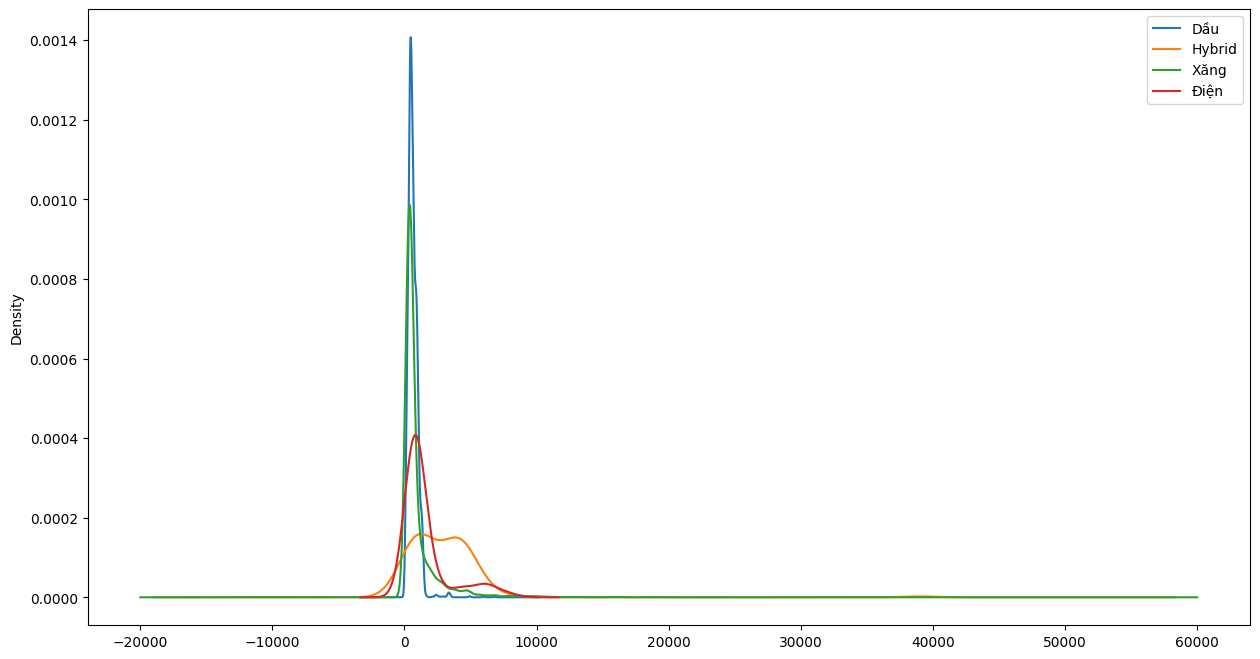

In [ ]:
df.groupby('fuel')['price'].plot(kind='kde', legend=True, figsize = (15,8))

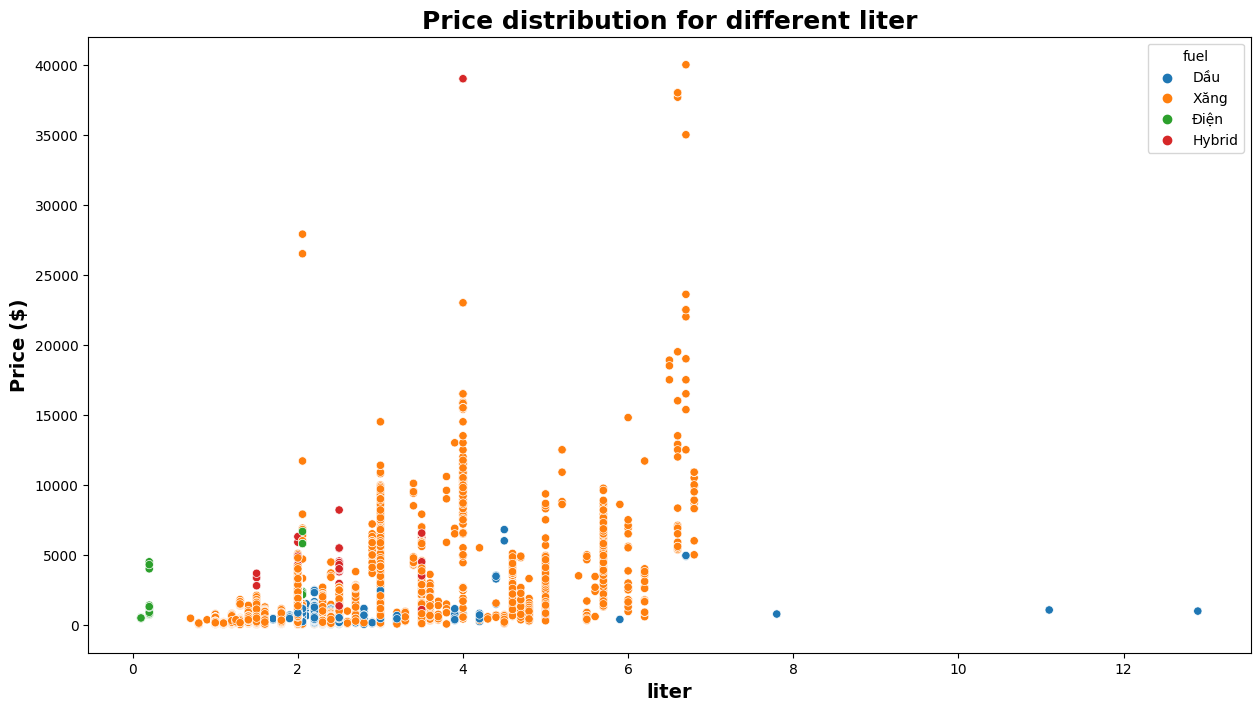

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='liter',y='price',hue = 'fuel', data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('liter',fontsize=14,fontweight="bold")
plt.title('Price distribution for different liter',fontsize=18,fontweight="bold")
plt.show()

From the above three plots, I observe significant differences of prices among diferent fuel type technologies.
* Vehicle prices using gasoline fuel have the widest price distribution
* The peak of the histogram is very high, which is a sign of great concentration at a particular value. This could be the mean, median, or another significant value in the data.
* Notice that most of the high-priced used cars are gasoline cars. This is easy to intepret since most of the luxury cars are gasoline type. Also for the gasoline cars a higher price from the plot since luxury cars are not that fuel efficient.
* Another findings is that for the alternative fuel vehicles such as Plug-in, electric, hydrogen, even though their mpg is very high, their prices are relatively stable under 9 billion dong. The reason is that the alternative fuel vehicles normally do not belong to luxury class, such as Volt, Bolt and Nissan Leaf. But for some plug-in cars, there are some mid-to-luxury cars such as Porsche plug-ins.